# Important libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings

# Loading data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**World bank data**

In [3]:
world_bank_gdp = pd.read_csv('/content/drive/MyDrive/data science project /world bank data/API_NY/gdp.csv', sep=',', skiprows=[0, 1, 2, 3])
print("World Bank GDP Data")
print(world_bank_gdp.head())

World Bank GDP Data
                  Country Name Country Code         Indicator Name  \
0                        Aruba          ABW  GDP growth (annual %)   
1  Africa Eastern and Southern          AFE  GDP growth (annual %)   
2                  Afghanistan          AFG  GDP growth (annual %)   
3   Africa Western and Central          AFW  GDP growth (annual %)   
4                       Angola          AGO  GDP growth (annual %)   

      Indicator Code  1960      1961      1962      1963     1964      1965  \
0  NY.GDP.MKTP.KD.ZG   NaN       NaN       NaN       NaN      NaN       NaN   
1  NY.GDP.MKTP.KD.ZG   NaN       NaN       NaN       NaN      NaN       NaN   
2  NY.GDP.MKTP.KD.ZG   NaN       NaN       NaN       NaN      NaN       NaN   
3  NY.GDP.MKTP.KD.ZG   NaN  1.857727  3.772943  7.277246  5.41295  4.084749   
4  NY.GDP.MKTP.KD.ZG   NaN       NaN       NaN       NaN      NaN       NaN   

   ...      2015      2016      2017      2018      2019       2020  \
0  ... -0.623

In [4]:
world_bank_employment = pd.read_csv('/content/drive/MyDrive/data science project /world bank data/API_SL/employment.csv', sep=',', skiprows=[0, 1, 2, 3])
print("World Bank Employment Data")
print(world_bank_employment.head())

World Bank Employment Data
                  Country Name Country Code  \
0                        Aruba          ABW   
1  Africa Eastern and Southern          AFE   
2                  Afghanistan          AFG   
3   Africa Western and Central          AFW   
4                       Angola          AGO   

                                      Indicator Name     Indicator Code  1960  \
0  Employment to population ratio, 15+, total (%)...  SL.EMP.TOTL.SP.ZS   NaN   
1  Employment to population ratio, 15+, total (%)...  SL.EMP.TOTL.SP.ZS   NaN   
2  Employment to population ratio, 15+, total (%)...  SL.EMP.TOTL.SP.ZS   NaN   
3  Employment to population ratio, 15+, total (%)...  SL.EMP.TOTL.SP.ZS   NaN   
4  Employment to population ratio, 15+, total (%)...  SL.EMP.TOTL.SP.ZS   NaN   

   1961  1962  1963  1964  1965  ...       2015       2016       2017  \
0   NaN   NaN   NaN   NaN   NaN  ...        NaN        NaN        NaN   
1   NaN   NaN   NaN   NaN   NaN  ...  65.222674  65.06383

In [5]:
world_bank_renewable = pd.read_csv('/content/drive/MyDrive/data science project /world bank data/API_EG-2/energy.csv', sep=',', skiprows=[0, 1, 2, 3])
print("World Bank Employment Data")
print(world_bank_renewable.head())

World Bank Employment Data
                  Country Name Country Code  \
0                        Aruba          ABW   
1  Africa Eastern and Southern          AFE   
2                  Afghanistan          AFG   
3   Africa Western and Central          AFW   
4                       Angola          AGO   

                                      Indicator Name  Indicator Code  1960  \
0  Renewable electricity output (% of total elect...  EG.ELC.RNEW.ZS   NaN   
1  Renewable electricity output (% of total elect...  EG.ELC.RNEW.ZS   NaN   
2  Renewable electricity output (% of total elect...  EG.ELC.RNEW.ZS   NaN   
3  Renewable electricity output (% of total elect...  EG.ELC.RNEW.ZS   NaN   
4  Renewable electricity output (% of total elect...  EG.ELC.RNEW.ZS   NaN   

   1961  1962  1963  1964  1965  ...       2015  2016  2017  2018  2019  2020  \
0   NaN   NaN   NaN   NaN   NaN  ...  14.856161   NaN   NaN   NaN   NaN   NaN   
1   NaN   NaN   NaN   NaN   NaN  ...  25.675879   NaN   NaN

**OECD data**

In [6]:
oecd_employment = pd.read_csv('/content/drive/MyDrive/data science project /OECD Statistics/employment.csv', sep=',')
print("OECD Employment Data")
print(oecd_employment.head())

OECD Employment Data
  STRUCTURE                                  STRUCTURE_ID   STRUCTURE_NAME  \
0  DATAFLOW  OECD.SDD.TPS:DSD_LFS@DF_IALFS_EMP_WAP_Q(1.0)  Employment rate   
1  DATAFLOW  OECD.SDD.TPS:DSD_LFS@DF_IALFS_EMP_WAP_Q(1.0)  Employment rate   
2  DATAFLOW  OECD.SDD.TPS:DSD_LFS@DF_IALFS_EMP_WAP_Q(1.0)  Employment rate   
3  DATAFLOW  OECD.SDD.TPS:DSD_LFS@DF_IALFS_EMP_WAP_Q(1.0)  Employment rate   
4  DATAFLOW  OECD.SDD.TPS:DSD_LFS@DF_IALFS_EMP_WAP_Q(1.0)  Employment rate   

  ACTION REF_AREA Reference area  MEASURE          Measure UNIT_MEASURE  \
0      I      DEU        Germany  EMP_WAP  Employment rate   PT_WAP_SUB   
1      I      DEU        Germany  EMP_WAP  Employment rate   PT_WAP_SUB   
2      I      SWE         Sweden  EMP_WAP  Employment rate   PT_WAP_SUB   
3      I      SWE         Sweden  EMP_WAP  Employment rate   PT_WAP_SUB   
4      I      SWE         Sweden  EMP_WAP  Employment rate   PT_WAP_SUB   

                                     Unit of measure  ... O

In [7]:
oecd_energy = pd.read_csv('/content/drive/MyDrive/data science project /OECD Statistics/energy.csv', sep=',')
print("OECD Energy Data")
print(oecd_energy.head())

OECD Energy Data
  STRUCTURE                                   STRUCTURE_ID  \
0  DATAFLOW  OECD.SDD.NAD.SEEA:DSD_NAT_RES@DF_NAT_RES(1.0)   
1  DATAFLOW  OECD.SDD.NAD.SEEA:DSD_NAT_RES@DF_NAT_RES(1.0)   
2  DATAFLOW  OECD.SDD.NAD.SEEA:DSD_NAT_RES@DF_NAT_RES(1.0)   
3  DATAFLOW  OECD.SDD.NAD.SEEA:DSD_NAT_RES@DF_NAT_RES(1.0)   
4  DATAFLOW  OECD.SDD.NAD.SEEA:DSD_NAT_RES@DF_NAT_RES(1.0)   

                 STRUCTURE_NAME ACTION REF_AREA Reference area FREQ  \
0  Mineral and Energy Resources      I      CAN         Canada    A   
1  Mineral and Energy Resources      I      CAN         Canada    A   
2  Mineral and Energy Resources      I      CAN         Canada    A   
3  Mineral and Energy Resources      I      CAN         Canada    A   
4  Mineral and Energy Resources      I      CAN         Canada    A   

  Frequency of observation UNIT_MEASURE Unit of measure  ...  SEEA  \
0                   Annual            T          Tonnes  ...  DOWN   
1                   Annual            T    

In [8]:
oecd_gdp = pd.read_csv('/content/drive/MyDrive/data science project /OECD Statistics/gdp.csv', sep=',')
print("OECD GDP Data")
print(oecd_gdp.head())

OECD GDP Data
  STRUCTURE                                       STRUCTURE_ID  \
0  DATAFLOW  OECD.SDD.NAD:DSD_NAMAIN10@DF_TABLE1_EXPENDITUR...   
1  DATAFLOW  OECD.SDD.NAD:DSD_NAMAIN10@DF_TABLE1_EXPENDITUR...   
2  DATAFLOW  OECD.SDD.NAD:DSD_NAMAIN10@DF_TABLE1_EXPENDITUR...   
3  DATAFLOW  OECD.SDD.NAD:DSD_NAMAIN10@DF_TABLE1_EXPENDITUR...   
4  DATAFLOW  OECD.SDD.NAD:DSD_NAMAIN10@DF_TABLE1_EXPENDITUR...   

                                      STRUCTURE_NAME ACTION FREQ  \
0  Annual GDP and components - expenditure approa...      I    A   
1  Annual GDP and components - expenditure approa...      I    A   
2  Annual GDP and components - expenditure approa...      I    A   
3  Annual GDP and components - expenditure approa...      I    A   
4  Annual GDP and components - expenditure approa...      I    A   

  Frequency of observation REF_AREA  Reference area SECTOR  \
0                   Annual      LTU       Lithuania     S1   
1                   Annual      GRC          Greece     

**Sustainable Development Goals (SDG) data**

In [9]:
sdg_unemployment = pd.read_excel('/content/drive/MyDrive/data science project /SDG/unemployment.xlsx')
print("SDG Unemployment Data")
print(sdg_unemployment.head())

SDG Unemployment Data
   Goal  Target Indicator            SeriesCode  \
0     8     8.5     8.5.2  SL_TLF_UEMDIS_19ICLS   
1     8     8.5     8.5.2  SL_TLF_UEMDIS_19ICLS   
2     8     8.5     8.5.2  SL_TLF_UEMDIS_19ICLS   
3     8     8.5     8.5.2  SL_TLF_UEMDIS_19ICLS   
4     8     8.5     8.5.2  SL_TLF_UEMDIS_19ICLS   

                                   SeriesDescription  GeoAreaCode  \
0  Unemployment rate, by sex and disability - 19t...            4   
1  Unemployment rate, by sex and disability - 19t...            4   
2  Unemployment rate, by sex and disability - 19t...            4   
3  Unemployment rate, by sex and disability - 19t...            4   
4  Unemployment rate, by sex and disability - 19t...            4   

   GeoAreaName  Age Disability status Observation Status  ... 2012 2013 2014  \
0  Afghanistan  15+                _T                  A  ...  NaN  NaN  NaN   
1  Afghanistan  15+                _T                  A  ...  NaN  NaN  NaN   
2  Afghanistan  

In [10]:
sdg_gdp = pd.read_excel('/content/drive/MyDrive/data science project /SDG/gdp.xlsx')
print("SDG GDP Data")
print(sdg_gdp.head())

SDG GDP Data
   Goal  Target Indicator   SeriesCode  \
0     8     8.1     8.1.1  NY_GDP_PCAP   
1     8     8.1     8.1.1  NY_GDP_PCAP   
2     8     8.1     8.1.1  NY_GDP_PCAP   
3     8     8.1     8.1.1  NY_GDP_PCAP   
4     8     8.1     8.1.1  NY_GDP_PCAP   

                               SeriesDescription  GeoAreaCode  GeoAreaName  \
0  Annual growth rate of real GDP per capita (%)            4  Afghanistan   
1  Annual growth rate of real GDP per capita (%)            2       Africa   
2  Annual growth rate of real GDP per capita (%)            8      Albania   
3  Annual growth rate of real GDP per capita (%)           12      Algeria   
4  Annual growth rate of real GDP per capita (%)           19     Americas   

  Observation Status Reporting Type    Units  ...  2012  2013  2014  2015  \
0                  A              G  PERCENT  ...   5.7   2.1  -1.4  -5.5   
1                  A              G  PERCENT  ...   3.2   1.2   1.4   0.8   
2                  A              

In [11]:
sdg_energy = pd.read_excel('/content/drive/MyDrive/data science project /SDG/energy.xlsx')
print("SDG Energy Data")
print(sdg_energy.head())

SDG Energy Data
   Goal  Target Indicator   SeriesCode  \
0     7     7.2     7.2.1  EG_FEC_RNEW   
1     7     7.2     7.2.1  EG_FEC_RNEW   
2     7     7.2     7.2.1  EG_FEC_RNEW   
3     7     7.2     7.2.1  EG_FEC_RNEW   
4     7     7.2     7.2.1  EG_FEC_RNEW   

                                   SeriesDescription  GeoAreaCode  \
0  Renewable energy share in the total final ener...            4   
1  Renewable energy share in the total final ener...            2   
2  Renewable energy share in the total final ener...            8   
3  Renewable energy share in the total final ener...           12   
4  Renewable energy share in the total final ener...           16   

      GeoAreaName Reporting Type    Units   2000  ...   2012   2013   2014  \
0     Afghanistan              G  PERCENT  44.99  ...  15.36  16.89  19.06   
1          Africa              G  PERCENT  60.66  ...  55.14  54.50  54.39   
2         Albania              G  PERCENT  41.36  ...  39.91  41.14  38.56   
3   

**world_bank_gdp, world_bank_employment, world_bank_renewable**

**oecd_employment, oecd_energy, oecd_gdp**

**sdg_unemployment, sdg_gdp, sdg_energy**

# Data Preprocessing

**Step 1: Prep the datasets for combining**

# 1. GDP

World bank data: gdp

In [12]:
columns_to_drop = ['Country Code', 'Indicator Name', 'Indicator Code', '1960']
world_bank_gdp = world_bank_gdp.drop(columns=columns_to_drop)

print(world_bank_gdp.head())

                  Country Name      1961      1962      1963     1964  \
0                        Aruba       NaN       NaN       NaN      NaN   
1  Africa Eastern and Southern       NaN       NaN       NaN      NaN   
2                  Afghanistan       NaN       NaN       NaN      NaN   
3   Africa Western and Central  1.857727  3.772943  7.277246  5.41295   
4                       Angola       NaN       NaN       NaN      NaN   

       1965      1966     1967      1968       1969  ...      2015      2016  \
0       NaN       NaN      NaN       NaN        NaN  ... -0.623626  1.719624   
1       NaN       NaN      NaN       NaN        NaN  ...  3.004495  2.172836   
2       NaN       NaN      NaN       NaN        NaN  ...  1.451315  2.260314   
3  4.084749 -1.776355 -9.54955  1.458912  15.536589  ...  2.813543  0.142092   
4       NaN       NaN      NaN       NaN        NaN  ...  0.943572 -2.580111   

       2017      2018      2019       2020       2021       2022  2023  \
0  7.0

In [13]:
world_bank_gdp_cleaned = world_bank_gdp.dropna(subset=world_bank_gdp.columns.difference(['Country Name']), how='all')

print(world_bank_gdp_cleaned.head())

                  Country Name      1961      1962      1963     1964  \
0                        Aruba       NaN       NaN       NaN      NaN   
1  Africa Eastern and Southern       NaN       NaN       NaN      NaN   
2                  Afghanistan       NaN       NaN       NaN      NaN   
3   Africa Western and Central  1.857727  3.772943  7.277246  5.41295   
4                       Angola       NaN       NaN       NaN      NaN   

       1965      1966     1967      1968       1969  ...      2015      2016  \
0       NaN       NaN      NaN       NaN        NaN  ... -0.623626  1.719624   
1       NaN       NaN      NaN       NaN        NaN  ...  3.004495  2.172836   
2       NaN       NaN      NaN       NaN        NaN  ...  1.451315  2.260314   
3  4.084749 -1.776355 -9.54955  1.458912  15.536589  ...  2.813543  0.142092   
4       NaN       NaN      NaN       NaN        NaN  ...  0.943572 -2.580111   

       2017      2018      2019       2020       2021       2022  2023  \
0  7.0

Sustainable Development Goals (SDG) data : gdp

In [14]:
columns_to_keep = ['GeoAreaName'] + [str(year) for year in range(2000, 2022)]
sdg_gdp_cleaned = sdg_gdp[columns_to_keep]

sdg_gdp_cleaned = sdg_gdp_cleaned.rename(columns={'GeoAreaName': 'Country Name'})

print(sdg_gdp_cleaned.head())

  Country Name  2000  2001  2002  2003  2004  2005  2006  2007  2008  ...  \
0  Afghanistan  -6.9  -6.4  54.7  -0.4  -2.3   5.3   4.0  24.0  -9.2  ...   
1       Africa   1.3   1.7   3.0   2.6   3.3   3.5   3.2   3.5   2.4  ...   
2      Albania   7.8   9.3   5.5   6.6   6.6   6.6   6.9   7.0   8.4  ...   
3      Algeria   2.4   1.6   4.2   5.8   2.8   4.5   0.2   1.7   0.7  ...   
4     Americas   2.7  -0.3   0.2   1.3   3.0   2.5   2.2   1.6  -0.1  ...   

   2012  2013  2014  2015  2016  2017  2018  2019  2020  2021  
0   5.7   2.1  -1.4  -5.5   0.2  -1.1  -1.1   7.6  -5.1 -23.0  
1   3.2   1.2   1.4   0.8  -0.6   1.0   0.8   0.1  -4.7   2.9  
2   1.7   1.2   1.9   2.3   3.4   3.9   4.1   2.2  -3.2   9.6  
3   1.4   0.8   1.8   1.6   1.2  -0.7  -0.7  -0.8  -6.7   1.7  
4   1.3   1.2   1.2   1.2   0.1   1.2   1.6   1.0  -4.1   5.4  

[5 rows x 23 columns]


OECD data : gdp

In [15]:
columns_to_keep = ['Reference area', 'TIME_PERIOD', 'OBS_VALUE']
oecd_gdp_cleaned = oecd_gdp[columns_to_keep]

oecd_gdp_cleaned = oecd_gdp_cleaned.rename(columns={
    'Reference area': 'Country Name',
    'TIME_PERIOD': 'Year',
    'OBS_VALUE': 'GDP'
})

print(oecd_gdp_cleaned.head())

     Country Name  Year        GDP
0       Lithuania  2017   4.282598
1          Greece  2021   8.379944
2          Greece  2015  -0.196091
3  United Kingdom  2020 -10.359901
4          Greece  2020  -9.316441


In [16]:
initial_country_data = oecd_gdp_cleaned[oecd_gdp_cleaned['Country Name'] == 'Australia']
print("Initial DataFrame for Australia:\n", initial_country_data)

# Сврти ги податоците во широк формат
oecd_gdp_pivoted = oecd_gdp_cleaned.pivot(index='Country Name', columns='Year', values='GDP')

oecd_gdp_pivoted.columns.name = None
oecd_gdp_pivoted.reset_index(inplace=True)

print("Pivoted DataFrame:\n", oecd_gdp_pivoted.head())

Initial DataFrame for Australia:
     Country Name  Year       GDP
256    Australia  2017  2.906363
257    Australia  2016  2.318709
258    Australia  2015  2.779143
259    Australia  2014  2.201810
260    Australia  2023  1.969950
261    Australia  2022  3.016988
262    Australia  2021  4.268946
263    Australia  2020  2.111831
264    Australia  2019 -0.334686
265    Australia  2018  2.181109
Pivoted DataFrame:
   Country Name      2014      2015      2016      2017      2018      2019  \
0    Australia  2.201810  2.779143  2.318709  2.906363  2.181109 -0.334686   
1      Austria  0.661273  1.014502  1.989437  2.258572  2.425385  1.450529   
2      Belgium  1.578533  2.041459  1.266686  1.619580  1.792945  2.240835   
3       Canada  2.873467  0.649971  1.038551  3.033835  2.742963  1.908432   
4        Chile  1.792649  2.151942  1.753039  1.357695  3.990029  0.634368   

       2020       2021      2022      2023  
0  2.111831   4.268946  3.016988  1.969950  
1 -6.632991   4.237867  

In [17]:
# Потврдете ги податоците за Австралија по вртењето
new_country_data = oecd_gdp_pivoted[oecd_gdp_pivoted['Country Name'] == 'Australia']
print("Reindexed DataFrame for Australia:\n", new_country_data)

Reindexed DataFrame for Australia:
   Country Name     2014      2015      2016      2017      2018      2019  \
0    Australia  2.20181  2.779143  2.318709  2.906363  2.181109 -0.334686   

       2020      2021      2022     2023  
0  2.111831  4.268946  3.016988  1.96995  


# **combining the gdp datasets**

In [18]:
temp_oecd = oecd_gdp_pivoted
temp_sdg = sdg_gdp_cleaned
temp_wb = world_bank_gdp_cleaned

In [19]:
print("Data types of columns in temp_oecd:\n", temp_oecd.dtypes)

Data types of columns in temp_oecd:
 Country Name     object
2014            float64
2015            float64
2016            float64
2017            float64
2018            float64
2019            float64
2020            float64
2021            float64
2022            float64
2023            float64
dtype: object


In [20]:
# Правилно претворање на колоните од годината во стринг
temp_oecd.columns = ['Country Name'] + [str(int(col)) if isinstance(col, (int, float)) else col for col in temp_oecd.columns[1:]]

temp_oecd.to_csv('temp_oecd_dataset.csv', index=False)
temp_oecd_loaded = pd.read_csv('temp_oecd_dataset.csv')
print(temp_oecd_loaded.head())

temp_oecd_loaded.columns = ['Country Name'] + [str(col) for col in temp_oecd_loaded.columns[1:]]

  Country Name      2014      2015      2016      2017      2018      2019  \
0    Australia  2.201810  2.779143  2.318709  2.906363  2.181109 -0.334686   
1      Austria  0.661273  1.014502  1.989437  2.258572  2.425385  1.450529   
2      Belgium  1.578533  2.041459  1.266686  1.619580  1.792945  2.240835   
3       Canada  2.873467  0.649971  1.038551  3.033835  2.742963  1.908432   
4        Chile  1.792649  2.151942  1.753039  1.357695  3.990029  0.634368   

       2020       2021      2022      2023  
0  2.111831   4.268946  3.016988  1.969950  
1 -6.632991   4.237867  4.806430 -0.828815  
2 -5.304473   6.927984  3.014722  1.365055  
3 -5.038233   5.286957  3.819866  1.248927  
4 -6.143475  11.333957  2.058740  0.218781  


In [ ]:
temp_oecd.head()

,Country Name,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Australia,2.201810,2.779143,2.318709,2.906363,2.181109,-0.334686,2.111831,4.268946,3.016988,1.969950
1,Austria,0.661273,1.014502,1.989437,2.258572,2.425385,1.450529,-6.632991,4.237867,4.806430,-0.828815
2,Belgium,1.578533,2.041459,1.266686,1.619580,1.792945,2.240835,-5.304473,6.927984,3.014722,1.365055
3,Canada,2.873467,0.649971,1.038551,3.033835,2.742963,1.908432,-5.038233,5.286957,3.819866,1.248927
4,Chile,1.792649,2.151942,1.753039,1.357695,3.990029,0.634368,-6.143475,11.333957,2.058740,0.218781


In [ ]:
temp_sdg.head()

,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Afghanistan,-6.9,-6.4,54.7,-0.4,-2.3,5.3,4.0,24.0,-9.2,...,5.7,2.1,-1.4,-5.5,0.2,-1.1,-1.1,7.6,-5.1,-23.0
1,Africa,1.3,1.7,3.0,2.6,3.3,3.5,3.2,3.5,2.4,...,3.2,1.2,1.4,0.8,-0.6,1.0,0.8,0.1,-4.7,2.9
2,Albania,7.8,9.3,5.5,6.6,6.6,6.6,6.9,7.0,8.4,...,1.7,1.2,1.9,2.3,3.4,3.9,4.1,2.2,-3.2,9.6
3,Algeria,2.4,1.6,4.2,5.8,2.8,4.5,0.2,1.7,0.7,...,1.4,0.8,1.8,1.6,1.2,-0.7,-0.7,-0.8,-6.7,1.7
4,Americas,2.7,-0.3,0.2,1.3,3.0,2.5,2.2,1.6,-0.1,...,1.3,1.2,1.2,1.2,0.1,1.2,1.6,1.0,-4.1,5.4


In [ ]:
temp_wb.head()

,Country Name,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.623626,1.719624,7.048533,2.381730,-2.302837,-23.982580,27.639357,10.458317,NaN,NaN
1,Africa Eastern and Southern,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.004495,2.172836,2.641704,2.681423,2.187553,-2.771340,4.504300,3.571318,NaN,NaN
2,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.451315,2.260314,2.647003,1.189228,3.911603,-2.351101,-20.738839,NaN,NaN,NaN
3,Africa Western and Central,1.857727,3.772943,7.277246,5.41295,4.084749,-1.776355,-9.54955,1.458912,15.536589,...,2.813543,0.142092,2.286270,2.838829,3.200919,-0.938162,3.976317,3.766354,NaN,NaN
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.943572,-2.580111,-0.147150,-1.316362,-0.702273,-5.638215,1.199211,3.045403,NaN,NaN


In [21]:
countries_wb = temp_wb['Country Name'].unique()
countries_oecd = temp_oecd['Country Name'].unique()
countries_sdg = temp_sdg['Country Name'].unique()

all_countries = np.unique(np.concatenate([countries_wb, countries_oecd, countries_sdg]))

In [22]:
years = list(map(str, range(1961, 2024)))

In [23]:
# Празна DataFrame со имиња на сите земји и години, исполнета со NaN
combined_gdp = pd.DataFrame(index=all_countries, columns=years)
combined_gdp.index.name = 'Country Name'
combined_gdp = combined_gdp.reset_index()

print("Empty combined_gdp DataFrame:\n", combined_gdp.head())

Empty combined_gdp DataFrame:
                   Country Name 1961 1962 1963 1964 1965 1966 1967 1968 1969  \
0                  Afghanistan  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1                       Africa  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2  Africa Eastern and Southern  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
3   Africa Western and Central  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
4                      Albania  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   ... 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023  
0  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
1  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
3  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
4  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[5 rows x 64 columns]


In [24]:
# Update combined_gdp with temp_wb data
for index, row in temp_wb.iterrows():
    country = row['Country Name']
    for year in years:
        if year in row:
            combined_gdp.loc[combined_gdp['Country Name'] == country, year] = row[year]

# Update combined_gdp with temp_sdg data
for index, row in temp_sdg.iterrows():
    country = row['Country Name']
    for year in years:
        if year in row and not pd.isna(row[year]):
            current_value = combined_gdp.loc[combined_gdp['Country Name'] == country, year].values[0]
            if not pd.isna(current_value):
                combined_gdp.loc[combined_gdp['Country Name'] == country, year] = (current_value + row[year]) / 2
            else:
                combined_gdp.loc[combined_gdp['Country Name'] == country, year] = row[year]

In [25]:
# Update combined_gdp with temp_oecd data
for index, row in temp_oecd_loaded.iterrows():
    country = row['Country Name']
    for year in years:
        if year in row and not pd.isna(row[year]):
            current_value = combined_gdp.loc[combined_gdp['Country Name'] == country, year].values[0]
            if not pd.isna(current_value):
                combined_gdp.loc[combined_gdp['Country Name'] == country, year] = (current_value + row[year]) / 2
            else:
                combined_gdp.loc[combined_gdp['Country Name'] == country, year] = row[year]

print("Updated combined_gdp DataFrame with temp_oecd data:\n", combined_gdp.head())


Updated combined_gdp DataFrame with temp_oecd data:
                   Country Name      1961      1962      1963     1964  \
0                  Afghanistan       NaN       NaN       NaN      NaN   
1                       Africa       NaN       NaN       NaN      NaN   
2  Africa Eastern and Southern       NaN       NaN       NaN      NaN   
3   Africa Western and Central  1.857727  3.772943  7.277246  5.41295   
4                      Albania       NaN       NaN       NaN      NaN   

       1965      1966     1967      1968       1969  ...      2014      2015  \
0       NaN       NaN      NaN       NaN        NaN  ...  0.662272 -2.024343   
1       NaN       NaN      NaN       NaN        NaN  ...       1.4       0.8   
2       NaN       NaN      NaN       NaN        NaN  ...  3.983296  3.004495   
3  4.084749 -1.776355 -9.54955  1.458912  15.536589  ...  5.926266  2.813543   
4       NaN       NaN      NaN       NaN        NaN  ...  1.837224  2.259363   

       2016      2017      

In [26]:
# Потврдување на податоците за Австралија
reindexed_country_data = combined_gdp[combined_gdp['Country Name'] == 'Australia']
print("Reindexed DataFrame for Australia:\n", reindexed_country_data)

Reindexed DataFrame for Australia:
    Country Name      1961      1962      1963      1964      1965      1966  \
17    Australia  2.482618  1.294258  6.216364  6.980438  5.980351  2.378807   

        1967      1968      1969  ...      2014      2015     2016      2017  \
17  6.305066  5.093751  7.045187  ...  1.902755  2.265024  2.02914  2.357859   

        2018      2019      2020      2021      2022     2023  
17  1.967145 -0.072066  1.197244  3.487431  3.642967  1.96995  

[1 rows x 64 columns]


**combined_gdp**

# **2. Energy**

World Bank Renewable Energy

In [ ]:
world_bank_renewable.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,Renewable electricity output (% of total elect...,EG.ELC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,14.856161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Renewable electricity output (% of total elect...,EG.ELC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,25.675879,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,Renewable electricity output (% of total elect...,EG.ELC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,86.050111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,Renewable electricity output (% of total elect...,EG.ELC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,31.233531,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,Renewable electricity output (% of total elect...,EG.ELC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,53.174928,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
years_range = list(map(str, range(1990, 2020)))

world_bank_renewable_cleaned = world_bank_renewable[['Country Name'] + years_range]

print("Cleaned world_bank_renewable dataset:\n", world_bank_renewable_cleaned.head())

Cleaned world_bank_renewable dataset:
                   Country Name       1990       1991       1992       1993  \
0                        Aruba   0.000000   0.000000   0.000000   0.000000   
1  Africa Eastern and Southern  14.365258  15.352872  14.105564  13.483070   
2                  Afghanistan  67.730496  67.980296  67.994310  68.345324   
3   Africa Western and Central  55.663149  60.318735  59.152300  57.433991   
4                       Angola  86.206897  82.655246  88.701162  93.684211   

        1994       1995       1996       1997       1998  ...       2010  \
0   0.000000   0.000000   0.000000   0.000000   0.000000  ...  11.327377   
1  13.232346  13.293881  12.738393  12.516603  14.875592  ...  21.162999   
2  68.704512  69.037037  70.370370  72.388060  74.436090  ...  85.986547   
3  54.759548  55.337545  54.619182  54.374801  48.372273  ...  38.547084   
4  93.717277  93.750000  89.980545  76.352531  80.424886  ...  67.957423   

        2011       2012       2013 

In [ ]:
sdg_energy.head()

,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Afghanistan,44.99,45.60,37.83,36.66,44.24,33.88,31.89,28.78,21.17,...,15.36,16.89,19.06,17.69,20.18,19.48,18.28,18.87,18.21,19.98
1,Africa,60.66,60.07,59.70,59.11,58.84,57.76,57.62,56.57,56.41,...,55.14,54.50,54.39,54.65,54.61,54.33,53.83,54.71,56.76,55.46
2,Albania,41.36,39.04,35.82,33.67,35.84,36.77,31.62,32.00,35.79,...,39.91,41.14,38.56,38.49,39.44,36.94,37.83,40.11,44.40,41.91
3,Algeria,0.43,0.43,0.51,0.47,0.44,0.58,0.41,0.41,0.30,...,0.18,0.13,0.07,0.06,0.08,0.14,0.19,0.16,0.15,0.12
4,American Samoa,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.09,0.16,0.16,0.17,0.21,0.35,0.35,0.36,0.38,0.39


In [28]:
# Prepare SDG data
columns_to_keep = ['GeoAreaName'] + [str(year) for year in range(2000, 2022)]
sdg_energy = sdg_energy[columns_to_keep]
sdg_energy = sdg_energy.rename(columns={'GeoAreaName': 'Country Name'})
sdg_energy = sdg_energy.set_index('Country Name').reindex(columns=[str(year) for year in range(2000, 2022)], fill_value=None).reset_index()


In [ ]:
sdg_energy.head()

,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Afghanistan,44.99,45.60,37.83,36.66,44.24,33.88,31.89,28.78,21.17,...,15.36,16.89,19.06,17.69,20.18,19.48,18.28,18.87,18.21,19.98
1,Africa,60.66,60.07,59.70,59.11,58.84,57.76,57.62,56.57,56.41,...,55.14,54.50,54.39,54.65,54.61,54.33,53.83,54.71,56.76,55.46
2,Albania,41.36,39.04,35.82,33.67,35.84,36.77,31.62,32.00,35.79,...,39.91,41.14,38.56,38.49,39.44,36.94,37.83,40.11,44.40,41.91
3,Algeria,0.43,0.43,0.51,0.47,0.44,0.58,0.41,0.41,0.30,...,0.18,0.13,0.07,0.06,0.08,0.14,0.19,0.16,0.15,0.12
4,American Samoa,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.09,0.16,0.16,0.17,0.21,0.35,0.35,0.36,0.38,0.39


In [ ]:
oecd_energy.head()

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,REF_AREA,Reference area,FREQ,Frequency of observation,UNIT_MEASURE,Unit of measure,...,SEEA,Stocks and flows,CLASS,Class,TIME_PERIOD,Time period,OBS_VALUE,Observation value,UNIT_MULT,Unit multiplier
0,DATAFLOW,OECD.SDD.NAD.SEEA:DSD_NAT_RES@DF_NAT_RES(1.0),Mineral and Energy Resources,I,CAN,Canada,A,Annual,T,Tonnes,...,DOWN,Downward reappraisals,A,Commercially recoverable resources,1976,NaN,0.002,NaN,9,Billions
1,DATAFLOW,OECD.SDD.NAD.SEEA:DSD_NAT_RES@DF_NAT_RES(1.0),Mineral and Energy Resources,I,CAN,Canada,A,Annual,T,Tonnes,...,DOWN,Downward reappraisals,A,Commercially recoverable resources,1977,NaN,0.002,NaN,9,Billions
2,DATAFLOW,OECD.SDD.NAD.SEEA:DSD_NAT_RES@DF_NAT_RES(1.0),Mineral and Energy Resources,I,CAN,Canada,A,Annual,T,Tonnes,...,DOWN,Downward reappraisals,A,Commercially recoverable resources,1978,NaN,0.002,NaN,9,Billions
3,DATAFLOW,OECD.SDD.NAD.SEEA:DSD_NAT_RES@DF_NAT_RES(1.0),Mineral and Energy Resources,I,CAN,Canada,A,Annual,T,Tonnes,...,DOWN,Downward reappraisals,A,Commercially recoverable resources,1979,NaN,0.047,NaN,9,Billions
4,DATAFLOW,OECD.SDD.NAD.SEEA:DSD_NAT_RES@DF_NAT_RES(1.0),Mineral and Energy Resources,I,CAN,Canada,A,Annual,T,Tonnes,...,DOWN,Downward reappraisals,A,Commercially recoverable resources,1981,NaN,0.004,NaN,9,Billions


In [29]:
# Филтрирање на податоците на ОЕЦД врз основа на "Closing stock"
desired_value = 'Closing stock'
oecd_energy_filtered = oecd_energy[oecd_energy['Stocks and flows'] == desired_value]

columns_to_keep = ['Reference area', 'TIME_PERIOD', 'OBS_VALUE']
oecd_energy_cleaned = oecd_energy_filtered[columns_to_keep]

oecd_energy_cleaned = oecd_energy_cleaned.rename(columns={
    'Reference area': 'Country Name',
    'TIME_PERIOD': 'Year',
    'OBS_VALUE': 'Renewable Energy'
})

In [ ]:
oecd_energy_cleaned.head()

,Country Name,Year,Renewable Energy
101,United States,1960,7429.072
102,United States,1961,7540.880
103,United States,1962,7710.941
104,United States,1963,7820.596
105,United States,1964,7965.028


In [30]:
oecd_energy_cleaned = oecd_energy_cleaned.groupby(['Country Name', 'Year']).sum().reset_index()

oecd_energy_pivoted = oecd_energy_cleaned.pivot(index='Country Name', columns='Year', values='Renewable Energy').reset_index()

oecd_energy_pivoted.columns.name = None

print(oecd_energy_pivoted.head())

  Country Name  1960    1961     1962     1963      1964      1965      1966  \
0    Australia   NaN     NaN      NaN      NaN       NaN       NaN       NaN   
1       Canada   NaN  836.57  884.228  934.497  1291.087  1322.703  1403.096   
2     Colombia   NaN     NaN      NaN      NaN       NaN       NaN       NaN   
3      Denmark   NaN     NaN      NaN      NaN       NaN       NaN       NaN   
4       Mexico   NaN     NaN      NaN      NaN       NaN       NaN       NaN   

       1967      1968  ...       2013       2014       2015       2016  \
0       NaN       NaN  ...  14031.244  14132.563  14513.986  15058.166   
1  1455.628  1553.235  ...   4193.921   4082.572   4130.019   4029.741   
2       NaN       NaN  ...    164.856    160.665    157.825    144.713   
3       NaN       NaN  ...     96.000     90.707     85.406     81.123   
4       NaN       NaN  ...   1719.035   1580.298    818.057    746.966   

        2017       2018       2019       2020       2021     2022  
0  146

In [31]:
# Правилно претворање на колоните од годината во стринг
oecd_energy_pivoted.columns = ['Country Name'] + [str(int(col)) if isinstance(col, (int, float)) else col for col in oecd_energy_pivoted.columns[1:]]

oecd_energy_pivoted.to_csv('oecd_energy_pivoted_dataset.csv', index=False)
oecd_energy_pivoted_loaded = pd.read_csv('oecd_energy_pivoted_dataset.csv')
print(oecd_energy_pivoted_loaded.head())

oecd_energy_pivoted_loaded.columns = ['Country Name'] + [str(col) for col in oecd_energy_pivoted_loaded.columns[1:]]


  Country Name  1960    1961     1962     1963      1964      1965      1966  \
0    Australia   NaN     NaN      NaN      NaN       NaN       NaN       NaN   
1       Canada   NaN  836.57  884.228  934.497  1291.087  1322.703  1403.096   
2     Colombia   NaN     NaN      NaN      NaN       NaN       NaN       NaN   
3      Denmark   NaN     NaN      NaN      NaN       NaN       NaN       NaN   
4       Mexico   NaN     NaN      NaN      NaN       NaN       NaN       NaN   

       1967      1968  ...       2013       2014       2015       2016  \
0       NaN       NaN  ...  14031.244  14132.563  14513.986  15058.166   
1  1455.628  1553.235  ...   4193.921   4082.572   4130.019   4029.741   
2       NaN       NaN  ...    164.856    160.665    157.825    144.713   
3       NaN       NaN  ...     96.000     90.707     85.406     81.123   
4       NaN       NaN  ...   1719.035   1580.298    818.057    746.966   

        2017       2018       2019       2020       2021     2022  
0  146

**combining the energy data**

In [32]:
energy_years = list(map(str, range(1960, 2023)))

countries_wb_energy = world_bank_renewable_cleaned['Country Name'].unique()
countries_oecd_energy = oecd_energy_pivoted['Country Name'].unique()
countries_sdg_energy = sdg_energy['Country Name'].unique()

all_energy_countries = np.unique(np.concatenate([countries_wb_energy, countries_oecd_energy, countries_sdg_energy]))

# Празна DataFrame со имиња на сите земји и години, исполнета со NaN
combined_energy = pd.DataFrame(index=all_energy_countries, columns=energy_years)
combined_energy.index.name = 'Country Name'
combined_energy = combined_energy.reset_index()

print("Empty combined_energy DataFrame:\n", combined_energy.head())

Empty combined_energy DataFrame:
                   Country Name 1960 1961 1962 1963 1964 1965 1966 1967 1968  \
0                  Afghanistan  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1                       Africa  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2  Africa Eastern and Southern  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
3   Africa Western and Central  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
4                      Albania  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   ... 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022  
0  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
1  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
3  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
4  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[5 rows x 64 columns]


In [33]:
# Проверка и претворање на годишните колони во oecd_energy_pivoted во стрингови
oecd_energy_pivoted.columns = ['Country Name'] + [str(int(col)) if isinstance(col, float) else col for col in oecd_energy_pivoted.columns[1:]]

In [34]:
# Update combined_energy with oecd_energy_pivoted data
for index, row in oecd_energy_pivoted.iterrows():
    country = row['Country Name']
    for year in energy_years:
        if year in row and not pd.isna(row[year]):
            combined_energy.loc[combined_energy['Country Name'] == country, year] = row[year]

print("Updated combined_energy DataFrame with oecd_energy_pivoted data:\n", combined_energy.head())

Updated combined_energy DataFrame with oecd_energy_pivoted data:
                   Country Name 1960 1961 1962 1963 1964 1965 1966 1967 1968  \
0                  Afghanistan  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1                       Africa  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2  Africa Eastern and Southern  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
3   Africa Western and Central  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
4                      Albania  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   ... 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022  
0  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
1  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
3  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
4  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[5 rows x 64 columns]


In [35]:
reindexed_country_data = combined_energy[combined_energy['Country Name'] == 'Australia']
print("Reindexed DataFrame for Australia:\n", reindexed_country_data)

Reindexed DataFrame for Australia:
    Country Name 1960 1961 1962 1963 1964 1965 1966 1967 1968  ...       2013  \
17    Australia  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  14031.244   

         2014       2015       2016     2017       2018       2019       2020  \
17  14132.563  14513.986  15058.166  14677.9  15593.832  16524.347  17125.543   

         2021 2022  
17  17657.766  NaN  

[1 rows x 64 columns]


In [36]:
# Iterate over each row in sdg_energy
for index, row in sdg_energy.iterrows():
    country = row['Country Name']
    for year in energy_years:
        if year in row and not pd.isna(row[year]):
            current_value = combined_energy.loc[combined_energy['Country Name'] == country, year].values[0]
            if not pd.isna(current_value):
                combined_energy.loc[combined_energy['Country Name'] == country, year] = (current_value + row[year]) / 2
            else:
                combined_energy.loc[combined_energy['Country Name'] == country, year] = row[year]

print("Updated combined_energy DataFrame with sdg_energy data:\n", combined_energy.head())

Updated combined_energy DataFrame with sdg_energy data:
                   Country Name 1960 1961 1962 1963 1964 1965 1966 1967 1968  \
0                  Afghanistan  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1                       Africa  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2  Africa Eastern and Southern  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
3   Africa Western and Central  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
4                      Albania  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   ...   2013   2014   2015   2016   2017   2018   2019   2020   2021 2022  
0  ...  16.89  19.06  17.69  20.18  19.48  18.28  18.87  18.21  19.98  NaN  
1  ...   54.5  54.39  54.65  54.61  54.33  53.83  54.71  56.76  55.46  NaN  
2  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  NaN  
3  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  NaN  
4  ...  41.14  38.56  38.49  39.44  36.94  37.83  40.11   44.4  41.91  NaN  

[5 ro

In [37]:
# Iterate over each row in world_bank_renewable_cleaned
for index, row in world_bank_renewable_cleaned.iterrows():
    country = row['Country Name']
    for year in energy_years:
        if year in row and not pd.isna(row[year]):
            current_value = combined_energy.loc[combined_energy['Country Name'] == country, year].values[0]
            if not pd.isna(current_value):
                combined_energy.loc[combined_energy['Country Name'] == country, year] = (current_value + row[year]) / 2
            else:
                combined_energy.loc[combined_energy['Country Name'] == country, year] = row[year]

print("Updated combined_energy DataFrame with world_bank_renewable_cleaned data:\n", combined_energy.head())

Updated combined_energy DataFrame with world_bank_renewable_cleaned data:
                   Country Name 1960 1961 1962 1963 1964 1965 1966 1967 1968  \
0                  Afghanistan  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1                       Africa  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2  Africa Eastern and Southern  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
3   Africa Western and Central  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
4                      Albania  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   ...       2013       2014       2015   2016   2017   2018   2019   2020  \
0  ...  47.763204  52.191775  51.870056  20.18  19.48  18.28  18.87  18.21   
1  ...       54.5      54.39      54.65  54.61  54.33  53.83  54.71  56.76   
2  ...  22.732604  24.966589  25.675879    NaN    NaN    NaN    NaN    NaN   
3  ...  35.163864  34.566146  31.233531    NaN    NaN    NaN    NaN    NaN   
4  ...      70.57      69.28     69.245  39.44  36.94  37.83

**combined_energy**

# **3. Employment data**

In [ ]:
world_bank_employment.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,"Employment to population ratio, 15+, total (%)...",SL.EMP.TOTL.SP.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Employment to population ratio, 15+, total (%)...",SL.EMP.TOTL.SP.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,65.222674,65.063834,64.969923,64.845470,64.649308,63.560774,63.612563,64.302928,64.436901,NaN
2,Afghanistan,AFG,"Employment to population ratio, 15+, total (%)...",SL.EMP.TOTL.SP.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,42.924000,42.472000,42.021000,40.493000,38.965000,36.711000,36.263000,32.333000,31.268000,NaN
3,Africa Western and Central,AFW,"Employment to population ratio, 15+, total (%)...",SL.EMP.TOTL.SP.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,59.763263,59.755348,59.372463,59.259533,59.158366,58.261096,58.490208,59.433005,59.620615,NaN
4,Angola,AGO,"Employment to population ratio, 15+, total (%)...",SL.EMP.TOTL.SP.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,63.656000,63.317000,63.028000,62.793000,62.642000,62.550000,64.304000,64.447000,64.492000,NaN


In [38]:
# Prepare World Bank data
columns_to_drop = ['Country Code', 'Indicator Name', 'Indicator Code'] + [str(year) for year in range(1960, 1991)]
world_bank_employment = world_bank_employment.drop(columns=columns_to_drop)
world_bank_employment = world_bank_employment.dropna(subset=world_bank_employment.columns.difference(['Country Name']), how='all')


In [ ]:
world_bank_employment.head()

,Country Name,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
1,Africa Eastern and Southern,66.041530,65.974563,65.934373,66.029321,66.302443,66.383777,66.381508,66.303712,66.220417,...,65.222674,65.063834,64.969923,64.845470,64.649308,63.560774,63.612563,64.302928,64.436901,NaN
2,Afghanistan,43.256000,43.244000,43.207000,43.162000,43.125000,43.071000,43.031000,43.007000,43.003000,...,42.924000,42.472000,42.021000,40.493000,38.965000,36.711000,36.263000,32.333000,31.268000,NaN
3,Africa Western and Central,63.236562,63.090800,62.912060,62.778071,62.667696,62.661030,62.610224,62.520311,62.282430,...,59.763263,59.755348,59.372463,59.259533,59.158366,58.261096,58.490208,59.433005,59.620615,NaN
4,Angola,64.525000,64.391000,63.924000,63.896000,64.309000,65.053000,65.142000,64.908000,64.637000,...,63.656000,63.317000,63.028000,62.793000,62.642000,62.550000,64.304000,64.447000,64.492000,NaN
5,Albania,57.568000,45.315000,47.798000,50.086000,53.186000,53.039000,51.873000,49.373000,48.201000,...,45.960000,48.473000,50.152000,52.006000,53.392000,50.001000,51.336000,53.304000,53.507000,NaN


In [ ]:
sdg_unemployment.head()

,Goal,Target,Indicator,SeriesCode,SeriesDescription,GeoAreaCode,GeoAreaName,Age,Disability status,Observation Status,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,8,8.5,8.5.2,SL_TLF_UEMDIS_19ICLS,"Unemployment rate, by sex and disability - 19t...",4,Afghanistan,15+,_T,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.16
1,8,8.5,8.5.2,SL_TLF_UEMDIS_19ICLS,"Unemployment rate, by sex and disability - 19t...",4,Afghanistan,15+,_T,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.29
2,8,8.5,8.5.2,SL_TLF_UEMDIS_19ICLS,"Unemployment rate, by sex and disability - 19t...",4,Afghanistan,15+,_T,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.11
3,8,8.5,8.5.2,SL_TLF_UEMDIS_19ICLS,"Unemployment rate, by sex and disability - 19t...",4,Afghanistan,15+,PD,U,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.43
4,8,8.5,8.5.2,SL_TLF_UEMDIS_19ICLS,"Unemployment rate, by sex and disability - 19t...",4,Afghanistan,15+,PD,U,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.17


In [39]:
# Filter the data
sdg_unemployment_filtered = sdg_unemployment[
    (sdg_unemployment['Age'] == '15+') &
    (sdg_unemployment['Disability status'] == '_T') &
    (sdg_unemployment['Sex'] == 'BOTHSEX')
]

columns_to_keep = ['GeoAreaName'] + [str(year) for year in range(2004, 2022)]
sdg_unemployment_filtered = sdg_unemployment_filtered[columns_to_keep]

sdg_unemployment_filtered = sdg_unemployment_filtered.rename(columns={'GeoAreaName': 'Country Name'})

print(sdg_unemployment_filtered.head())

   Country Name   2004   2005   2006   2007   2008   2009   2010   2011  \
0   Afghanistan    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
8       Armenia    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
18      Austria   6.88   5.80   8.07   7.84   6.10   8.81   7.72   8.62   
27     Barbados    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
35      Belgium  13.72  14.25  12.01  11.02  10.07  11.08  11.40  11.26   

     2012   2013   2014   2015   2016  2017   2018   2019   2020   2021  
0     NaN    NaN    NaN    NaN    NaN   NaN    NaN    NaN    NaN  13.16  
8     NaN    NaN    NaN    NaN    NaN   NaN  18.97  18.30  18.18  15.47  
18   7.81   8.72   9.91   9.09   9.23  8.09   7.62   8.80  10.40   9.41  
27    NaN    NaN    NaN    NaN  11.70   NaN    NaN    NaN    NaN    NaN  
35  10.79  11.14  11.55  10.69  10.13  9.55   7.51   7.15   7.47   7.26  


oecd_employment

In [ ]:
oecd_employment.head()

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,REF_AREA,Reference area,MEASURE,Measure,UNIT_MEASURE,Unit of measure,...,OBS_VALUE,Observation value,BASE_PER,Base period,OBS_STATUS,Observation status,UNIT_MULT,Unit multiplier,DECIMALS,Decimals
0,DATAFLOW,OECD.SDD.TPS:DSD_LFS@DF_IALFS_EMP_WAP_Q(1.0),Employment rate,I,DEU,Germany,EMP_WAP,Employment rate,PT_WAP_SUB,Percentage of working age population in the sa...,...,77.08976,NaN,NaN,NaN,E,Estimated value,0,Units,1,One
1,DATAFLOW,OECD.SDD.TPS:DSD_LFS@DF_IALFS_EMP_WAP_Q(1.0),Employment rate,I,DEU,Germany,EMP_WAP,Employment rate,PT_WAP_SUB,Percentage of working age population in the sa...,...,76.89897,NaN,NaN,NaN,E,Estimated value,0,Units,1,One
2,DATAFLOW,OECD.SDD.TPS:DSD_LFS@DF_IALFS_EMP_WAP_Q(1.0),Employment rate,I,SWE,Sweden,EMP_WAP,Employment rate,PT_WAP_SUB,Percentage of working age population in the sa...,...,77.26054,NaN,NaN,NaN,A,Normal value,0,Units,1,One
3,DATAFLOW,OECD.SDD.TPS:DSD_LFS@DF_IALFS_EMP_WAP_Q(1.0),Employment rate,I,SWE,Sweden,EMP_WAP,Employment rate,PT_WAP_SUB,Percentage of working age population in the sa...,...,77.00662,NaN,NaN,NaN,A,Normal value,0,Units,1,One
4,DATAFLOW,OECD.SDD.TPS:DSD_LFS@DF_IALFS_EMP_WAP_Q(1.0),Employment rate,I,SWE,Sweden,EMP_WAP,Employment rate,PT_WAP_SUB,Percentage of working age population in the sa...,...,77.23729,NaN,NaN,NaN,A,Normal value,0,Units,1,One


In [40]:
columns_to_keep = ['Reference area', 'TIME_PERIOD', 'OBS_VALUE']
oecd_employment_cleaned = oecd_employment[columns_to_keep]

oecd_employment_cleaned = oecd_employment_cleaned.rename(columns={
    'Reference area': 'Country Name',
    'TIME_PERIOD': 'Year',
    'OBS_VALUE': 'Employment'
})

In [41]:
# Extract the year from the 'TIME_PERIOD' column
oecd_employment_cleaned['Year'] = oecd_employment['TIME_PERIOD'].str[:4].astype(int)

In [ ]:
oecd_employment_cleaned.head()

,Country Name,Year,Employment
0,Germany,2023,77.08976
1,Germany,2022,76.89897
2,Sweden,2022,77.26054
3,Sweden,2024,77.00662
4,Sweden,2023,77.23729


In [42]:
oecd_employment_cleaned = oecd_employment_cleaned.groupby(['Country Name', 'Year'], as_index=False)['Employment'].mean()

In [ ]:
oecd_employment_cleaned.head()

,Country Name,Year,Employment
0,Australia,2022,77.195655
1,Australia,2023,77.176780
2,Australia,2024,76.864400
3,Austria,2022,73.859250
4,Austria,2023,74.111247


In [43]:
oecd_employment_cleaned = oecd_employment_cleaned.pivot(index='Country Name', columns='Year', values='Employment').reset_index()

oecd_employment_cleaned.columns.name = None

print(oecd_employment_cleaned.head())

  Country Name       2022       2023      2024
0    Australia  77.195655  77.176780  76.86440
1      Austria  73.859250  74.111247  74.11564
2      Belgium  66.738900  66.576243  66.41374
3     Bulgaria  71.180405  70.673043  70.90790
4       Canada  75.733335  75.825000  75.03333


**Convert SDG Unemployment Data to Employment Data**

In [44]:
# Convert unemployment to employment
for year in range(2004, 2022):
    sdg_unemployment_filtered[str(year)] = 100 - sdg_unemployment_filtered[str(year)]

In [ ]:
sdg_unemployment_filtered.head()

,Country Name,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.84
8,Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.03,81.70,81.82,84.53
18,Austria,93.12,94.20,91.93,92.16,93.90,91.19,92.28,91.38,92.19,91.28,90.09,90.91,90.77,91.91,92.38,91.20,89.60,90.59
27,Barbados,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88.30,NaN,NaN,NaN,NaN,NaN
35,Belgium,86.28,85.75,87.99,88.98,89.93,88.92,88.60,88.74,89.21,88.86,88.45,89.31,89.87,90.45,92.49,92.85,92.53,92.74


comining employment data

In [45]:
years = list(map(str, range(1991, 2025)))

countries_wb_employment = world_bank_employment['Country Name'].unique()
countries_oecd_employment = oecd_employment_cleaned['Country Name'].unique()
countries_sdg_employment = sdg_unemployment_filtered['Country Name'].unique()

all_employment_countries = np.unique(np.concatenate([countries_wb_employment, countries_oecd_employment, countries_sdg_employment]))

# Празна DataFrame со имиња на сите земји и години, исполнета со NaN
combined_employment = pd.DataFrame(index=all_employment_countries, columns=years)
combined_employment.index.name = 'Country Name'
combined_employment = combined_employment.reset_index()

print("Empty combined_employment DataFrame:\n", combined_employment.head())

Empty combined_employment DataFrame:
                   Country Name 1991 1992 1993 1994 1995 1996 1997 1998 1999  \
0                  Afghanistan  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1  Africa Eastern and Southern  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2   Africa Western and Central  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
3                      Albania  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
4                      Algeria  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   ... 2015 2016 2017 2018 2019 2020 2021 2022 2023 2024  
0  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
1  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
3  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
4  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[5 rows x 35 columns]


In [46]:
# Проверка и претворање на годишните колони во oecd_employment_cleaned во стринг
oecd_employment_cleaned.columns = ['Country Name'] + [str(int(col)) if isinstance(col, int) else col for col in oecd_employment_cleaned.columns[1:]]

In [47]:
# Display the oecd_employment_cleaned dataset to verify its contents
print("Contents of oecd_employment_cleaned dataset:\n", oecd_employment_cleaned.head())

Contents of oecd_employment_cleaned dataset:
   Country Name       2022       2023      2024
0    Australia  77.195655  77.176780  76.86440
1      Austria  73.859250  74.111247  74.11564
2      Belgium  66.738900  66.576243  66.41374
3     Bulgaria  71.180405  70.673043  70.90790
4       Canada  75.733335  75.825000  75.03333


In [48]:
# Update combined_employment with oecd_employment_cleaned data
for index, row in oecd_employment_cleaned.iterrows():
    country = row['Country Name']
    for year in years:
        if year in row and not pd.isna(row[year]):
            combined_employment.loc[combined_employment['Country Name'] == country, year] = row[year]

print("Updated combined_employment DataFrame with oecd_employment_cleaned data:\n", combined_employment.head())

Updated combined_employment DataFrame with oecd_employment_cleaned data:
                   Country Name 1991 1992 1993 1994 1995 1996 1997 1998 1999  \
0                  Afghanistan  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1  Africa Eastern and Southern  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2   Africa Western and Central  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
3                      Albania  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
4                      Algeria  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   ... 2015 2016 2017 2018 2019 2020 2021 2022 2023 2024  
0  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
1  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
3  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
4  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[5 rows x 35 columns]


In [49]:
# Verify the data for Australia
reindexed_country_data = combined_employment[combined_employment['Country Name'] == 'Australia']
print("Reindexed DataFrame for Australia:\n", reindexed_country_data)

Reindexed DataFrame for Australia:
   Country Name 1991 1992 1993 1994 1995 1996 1997 1998 1999  ... 2015 2016  \
9    Australia  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   

  2017 2018 2019 2020 2021       2022      2023     2024  
9  NaN  NaN  NaN  NaN  NaN  77.195655  77.17678  76.8644  

[1 rows x 35 columns]


In [50]:
# Iterate over each row in sdg_unemployment_filtered
for index, row in sdg_unemployment_filtered.iterrows():
    country = row['Country Name']
    for year in years:
        if year in row and not pd.isna(row[year]):
            current_value = combined_employment.loc[combined_employment['Country Name'] == country, year].values[0]
            if not pd.isna(current_value):
                combined_employment.loc[combined_employment['Country Name'] == country, year] = (current_value + row[year]) / 2
            else:
                combined_employment.loc[combined_employment['Country Name'] == country, year] = row[year]

print("Updated combined_employment DataFrame with sdg_employment_data:\n", combined_employment.head())

Updated combined_employment DataFrame with sdg_employment_data:
                   Country Name 1991 1992 1993 1994 1995 1996 1997 1998 1999  \
0                  Afghanistan  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1  Africa Eastern and Southern  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2   Africa Western and Central  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
3                      Albania  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
4                      Algeria  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   ... 2015 2016 2017 2018 2019 2020   2021 2022 2023 2024  
0  ...  NaN  NaN  NaN  NaN  NaN  NaN  86.84  NaN  NaN  NaN  
1  ...  NaN  NaN  NaN  NaN  NaN  NaN    NaN  NaN  NaN  NaN  
2  ...  NaN  NaN  NaN  NaN  NaN  NaN    NaN  NaN  NaN  NaN  
3  ...  NaN  NaN  NaN  NaN  NaN  NaN    NaN  NaN  NaN  NaN  
4  ...  NaN  NaN  NaN  NaN  NaN  NaN    NaN  NaN  NaN  NaN  

[5 rows x 35 columns]


In [51]:
# Iterate over each row in world_bank_employment
for index, row in world_bank_employment.iterrows():
    country = row['Country Name']
    for year in years:
        if year in row and not pd.isna(row[year]):
            current_value = combined_employment.loc[combined_employment['Country Name'] == country, year].values[0]
            if not pd.isna(current_value):
                combined_employment.loc[combined_employment['Country Name'] == country, year] = (current_value + row[year]) / 2
            else:
                combined_employment.loc[combined_employment['Country Name'] == country, year] = row[year]

print("Updated combined_employment DataFrame with world_bank_employment data:\n", combined_employment.head())

Updated combined_employment DataFrame with world_bank_employment data:
                   Country Name       1991       1992       1993       1994  \
0                  Afghanistan     43.256     43.244     43.207     43.162   
1  Africa Eastern and Southern   66.04153  65.974563  65.934373  66.029321   
2   Africa Western and Central  63.236562    63.0908   62.91206  62.778071   
3                      Albania     57.568     45.315     47.798     50.086   
4                      Algeria     34.944     33.389     32.836     32.382   

        1995       1996       1997       1998       1999  ...       2015  \
0     43.125     43.071     43.031     43.007     43.003  ...     42.924   
1  66.302443  66.383777  66.381508  66.303712  66.220417  ...  65.222674   
2  62.667696   62.66103  62.610224  62.520311   62.28243  ...  59.763263   
3     53.186     53.039     51.873     49.373     48.201  ...      45.96   
4     30.587     32.199     33.295     32.461      31.52  ...     37.033   

  

# **COMBINED DATASETS: combined_gdp, combined_energy and combined_employment**

Now that we have the combined datasets for GDP, energy, and employment, we can proceed with analyzing the economic impacts of adopting renewable energy sources.

# **1. Data Preparation**

Step 1: Identify Common Time Range

In [52]:
# Extract columns that are years
years_gdp = set(combined_gdp.columns[1:])
years_energy = set(combined_energy.columns[1:])
years_employment = set(combined_employment.columns[1:])

# Find the common years
common_years = list(years_gdp.intersection(years_energy).intersection(years_employment))
common_years.sort()
print("Common Years:", common_years)

Common Years: ['1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']


Step 2: Identify Common Country Names

In [53]:
# Extract country names
countries_gdp = set(combined_gdp['Country Name'])
countries_energy = set(combined_energy['Country Name'])
countries_employment = set(combined_employment['Country Name'])

# Find the common country names
common_countries = list(countries_gdp.intersection(countries_energy).intersection(countries_employment))
common_countries.sort()
print("Common Countries:", common_countries)

Common Countries: ['Afghanistan', 'Africa Eastern and Southern', 'Africa Western and Central', 'Albania', 'Algeria', 'Angola', 'Arab World', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Caribbean small states', 'Central African Republic', 'Central Europe and the Baltics', 'Chad', 'Channel Islands', 'Chile', 'China', 'China, Hong Kong Special Administrative Region', 'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', "Côte d'Ivoire", 'Denmark', 'Djibouti', 'Dominican Republic', 'Early-demographic dividend', 'East Asia & Pacific', 'East Asia & Pacific (IDA & IBRD countries)', 'East Asia & Pacific (excluding high 

Step 3: Align the Datasets

In [54]:
# Filter the GDP data
aligned_gdp = combined_gdp[combined_gdp['Country Name'].isin(common_countries)]
aligned_gdp = aligned_gdp[['Country Name'] + common_years]

# Filter the Energy data
aligned_energy = combined_energy[combined_energy['Country Name'].isin(common_countries)]
aligned_energy = aligned_energy[['Country Name'] + common_years]

# Filter the Employment data
aligned_employment = combined_employment[combined_employment['Country Name'].isin(common_countries)]
aligned_employment = aligned_employment[['Country Name'] + common_years]

# Display aligned datasets
print("Aligned GDP Data:\n", aligned_gdp.head())
print("Aligned Energy Data:\n", aligned_energy.head())
print("Aligned Employment Data:\n", aligned_employment.head())

Aligned GDP Data:
                   Country Name       1991      1992      1993      1994  \
0                  Afghanistan        NaN       NaN       NaN       NaN   
2  Africa Eastern and Southern  -0.112181 -2.316064 -0.619655  2.023842   
3   Africa Western and Central   1.109776  2.689939 -1.206116 -0.271454   
4                      Albania -28.002142 -7.187111  9.559412  8.302867   
5                      Algeria  -1.200001  1.800002 -2.100001 -0.899997   

        1995      1996       1997      1998       1999  ...      2013  \
0        NaN       NaN        NaN       NaN        NaN  ...  3.850372   
2   4.285337  5.442986   3.853753   1.73366   2.631178  ...  4.303139   
3   1.931598  4.639764   4.258151  3.481741   1.420224  ...  6.107013   
4  13.322333  9.099999 -10.919984  8.829424  12.890804  ...  1.101009   
5   3.799995  4.099998        1.1  5.100004   3.200002  ...       1.8   

       2014      2015      2016      2017      2018      2019      2020  \
0  0.662272 -2.0

In [55]:
scaler = MinMaxScaler()

# Apply the scaler to the aligned GDP data
gdp_data = aligned_gdp.drop(columns=['Country Name'])
scaled_gdp = scaler.fit_transform(gdp_data)
scaled_gdp = pd.DataFrame(scaled_gdp, columns=gdp_data.columns, index=gdp_data.index)
scaled_gdp['Country Name'] = aligned_gdp['Country Name']

# Apply the scaler to the aligned Energy data
energy_data = aligned_energy.drop(columns=['Country Name'])
scaled_energy = scaler.fit_transform(energy_data)
scaled_energy = pd.DataFrame(scaled_energy, columns=energy_data.columns, index=energy_data.index)
scaled_energy['Country Name'] = aligned_energy['Country Name']

# Apply the scaler to the aligned Employment data
employment_data = aligned_employment.drop(columns=['Country Name'])
scaled_employment = scaler.fit_transform(employment_data)
scaled_employment = pd.DataFrame(scaled_employment, columns=employment_data.columns, index=employment_data.index)
scaled_employment['Country Name'] = aligned_employment['Country Name']

# Display scaled data
print("Scaled GDP Data:\n", scaled_gdp.head())
print("Scaled Energy Data:\n", scaled_energy.head())
print("Scaled Employment Data:\n", scaled_employment.head())

Scaled GDP Data:
        1991      1992      1993      1994      1995      1996      1997  \
0       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2  0.563331  0.534670  0.453154  0.731388  0.350578  0.209573  0.109509   
3  0.574097  0.597523  0.443888  0.699272  0.301171  0.201971  0.111973   
4  0.317592  0.473510  0.613985  0.819244  0.540270  0.244185  0.019474   
5  0.553746  0.586350  0.429765  0.690478  0.340390  0.196862  0.092727   

       1998      1999      2000  ...      2014      2015      2016      2017  \
0       NaN       NaN  0.186014  ...  0.455246  0.497742  0.512550  0.275345   
2  0.473873  0.343573  0.452913  ...  0.517123  0.594125  0.553712  0.319411   
3  0.501639  0.309061  0.466983  ...  0.553324  0.590465  0.465040  0.311027   
4  0.586581  0.635968  0.563226  ...  0.477137  0.579844  0.605439  0.347942   
5  0.527343  0.359784  0.450295  ...  0.495076  0.587330  0.554898  0.264176   

       2018      2019      2020      2021      202

# **2. Data Analysis & Visualization**

**2.1 Exploratory Data Analysis (EDA):**

Summary statistics.
Correlation analysis.
Visualizations to understand the distribution and trends of the data.

In [56]:
# Summary statistics
print("Summary Statistics for Scaled GDP Data:\n", scaled_gdp.describe())

print("Summary Statistics for Scaled Energy Data:\n", scaled_energy.describe())

print("Summary Statistics for Scaled Employment Data:\n", scaled_employment.describe())

Summary Statistics for Scaled GDP Data:
              1991        1992        1993        1994        1995        1996  \
count  205.000000  206.000000  209.000000  210.000000  212.000000  222.000000   
mean     0.576415    0.584463    0.493446    0.732774    0.344203    0.204902   
std      0.069844    0.105677    0.109781    0.104373    0.104842    0.075443   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.560474    0.560238    0.453879    0.718094    0.309980    0.179398   
50%      0.580074    0.590165    0.497545    0.749557    0.343173    0.199810   
75%      0.604850    0.635923    0.539576    0.776645    0.389570    0.216668   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

             1997        1998        1999        2000  ...        2013  \
count  222.000000  223.000000  223.000000  244.000000  ...  249.000000   
mean     0.116342    0.499996    0.360542    0.467296  ...    0.703907   
std    

In [57]:
gdp_corr = scaled_gdp.drop(columns=['Country Name']).corr()
energy_corr = scaled_energy.drop(columns=['Country Name']).corr()
employment_corr = scaled_employment.drop(columns=['Country Name']).corr()

print("Correlation Matrix for Scaled GDP Data:\n", gdp_corr)
print("Correlation Matrix for Scaled Energy Data:\n", energy_corr)
print("Correlation Matrix for Scaled Employment Data:\n", employment_corr)

Correlation Matrix for Scaled GDP Data:
           1991      1992      1993      1994      1995      1996      1997  \
1991  1.000000  0.276236  0.156430  0.236406  0.092097  0.029429 -0.025221   
1992  0.276236  1.000000  0.677536  0.451256  0.363612  0.328858  0.334988   
1993  0.156430  0.677536  1.000000  0.502365  0.304626  0.235236  0.118249   
1994  0.236406  0.451256  0.502365  1.000000  0.163381  0.257752  0.153906   
1995  0.092097  0.363612  0.304626  0.163381  1.000000  0.467173  0.294209   
1996  0.029429  0.328858  0.235236  0.257752  0.467173  1.000000  0.670778   
1997 -0.025221  0.334988  0.118249  0.153906  0.294209  0.670778  1.000000   
1998 -0.307732  0.196046  0.119333  0.001271  0.114035  0.323987  0.401878   
1999 -0.234465  0.178128  0.178715  0.014789  0.240369  0.391024  0.430779   
2000 -0.165825  0.032092  0.012144 -0.178326  0.042283  0.189696  0.247121   
2001 -0.093292  0.079496 -0.054541 -0.015487  0.116896  0.404850  0.688719   
2002  0.012402 -0.16620

**2.2 Visualizations:**

Line plots for time series data.
Heatmaps for correlation.
Scatter plots to explore relationships between variables.

In [ ]:
combined_gdp.head()

,Country Name,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.662272,-2.024343,1.230157,0.773502,0.044614,5.755802,-3.72555,-21.86942,NaN,NaN
1,Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.4,0.8,-0.6,1.0,0.8,0.1,-4.7,2.9,NaN,NaN
2,Africa Eastern and Southern,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.983296,3.004495,2.172836,2.641704,2.681423,2.187553,-2.77134,4.5043,3.571318,NaN
3,Africa Western and Central,1.857727,3.772943,7.277246,5.41295,4.084749,-1.776355,-9.54955,1.458912,15.536589,...,5.926266,2.813543,0.142092,2.28627,2.838829,3.200919,-0.938162,3.976317,3.766354,NaN
4,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.837224,2.259363,3.35749,3.851299,4.059673,2.143856,-3.251041,9.254264,4.856402,NaN


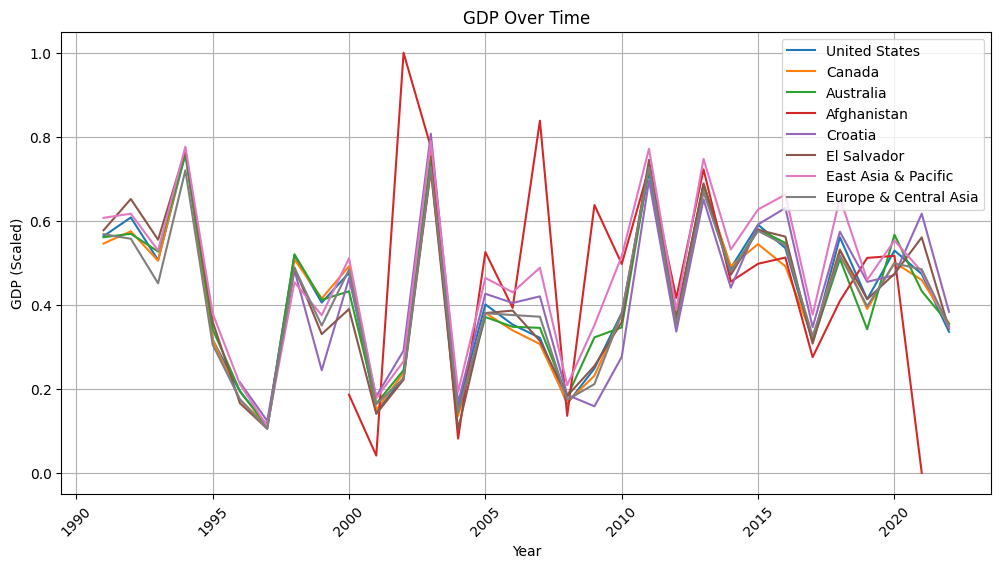

In [58]:
# List of countries to plot
countries_to_plot = ['United States', 'Canada', 'Australia', 'Afghanistan', 'Croatia', 'El Salvador', 'East Asia & Pacific', 'Europe & Central Asia']

# Line plot for GDP data
plt.figure(figsize=(12, 6))
for country in countries_to_plot:
    country_data = scaled_gdp[scaled_gdp['Country Name'] == country].drop(columns=['Country Name']).T
    country_data.columns = [country]
    country_data.index = country_data.index.astype(int)
    plt.plot(country_data.index, country_data[country], label=country)

plt.title('GDP Over Time')
plt.xlabel('Year')
plt.ylabel('GDP (Scaled)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

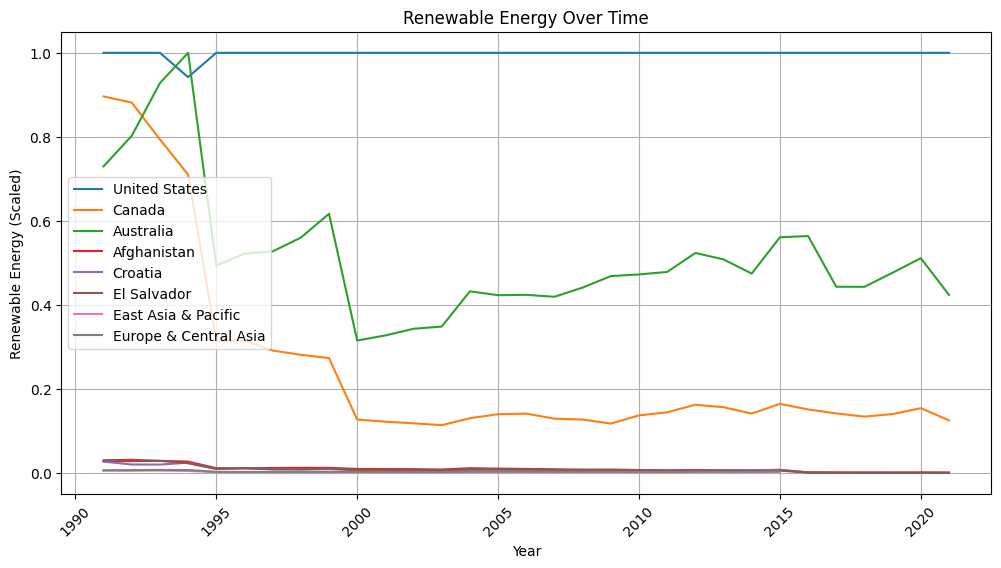

In [59]:
# Line plot for Energy data
plt.figure(figsize=(12, 6))
for country in countries_to_plot:
    country_data = scaled_energy[scaled_energy['Country Name'] == country].drop(columns=['Country Name']).T
    country_data.columns = [country]  # Set country name as column header
    country_data.index = country_data.index.astype(int)  # Convert index to integer
    plt.plot(country_data.index, country_data[country], label=country)
plt.title('Renewable Energy Over Time')
plt.xlabel('Year')
plt.ylabel('Renewable Energy (Scaled)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

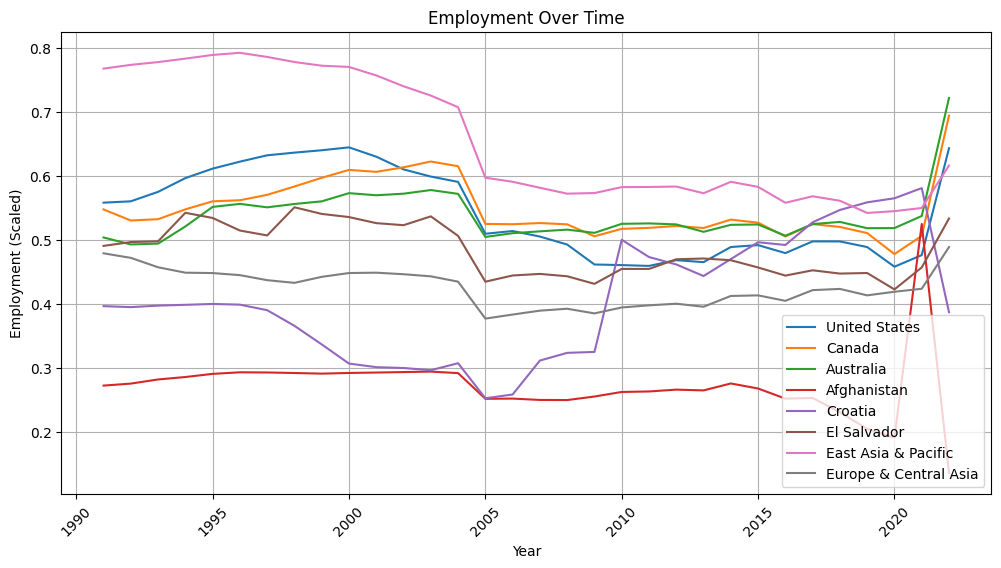

In [60]:
# Line plot for Employment data
plt.figure(figsize=(12, 6))
for country in countries_to_plot:
    country_data = scaled_employment[scaled_employment['Country Name'] == country].drop(columns=['Country Name']).T
    country_data.columns = [country]
    country_data.index = country_data.index.astype(int)
    plt.plot(country_data.index, country_data[country], label=country)

plt.title('Employment Over Time')
plt.xlabel('Year')
plt.ylabel('Employment (Scaled)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Heatmaps for Correlation

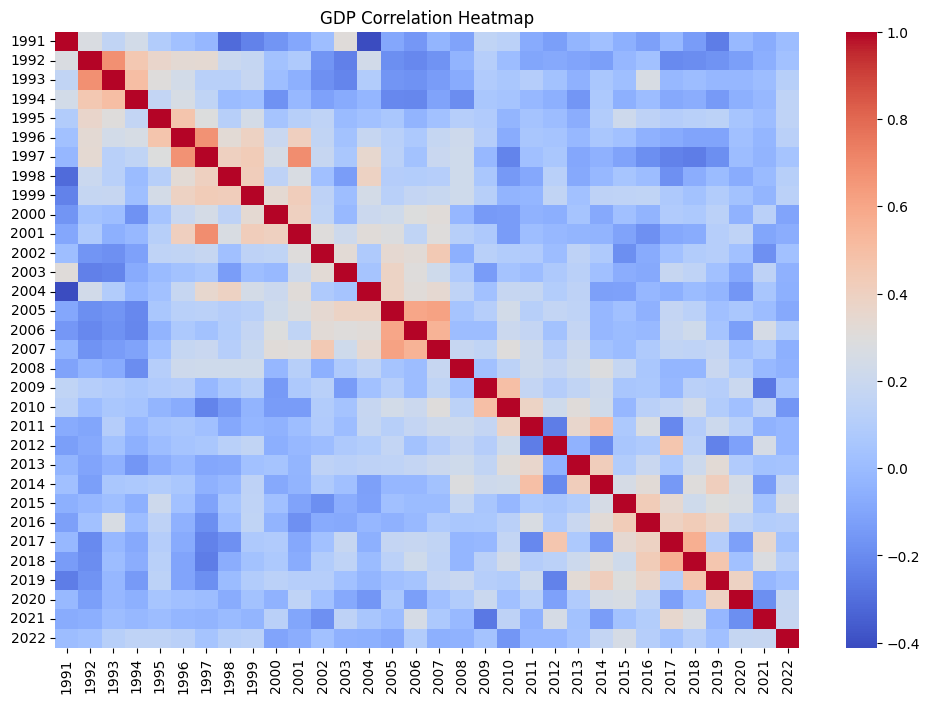

In [61]:
plt.figure(figsize=(12, 8))
sns.heatmap(gdp_corr, annot=False, cmap='coolwarm')
plt.title('GDP Correlation Heatmap')
plt.show()

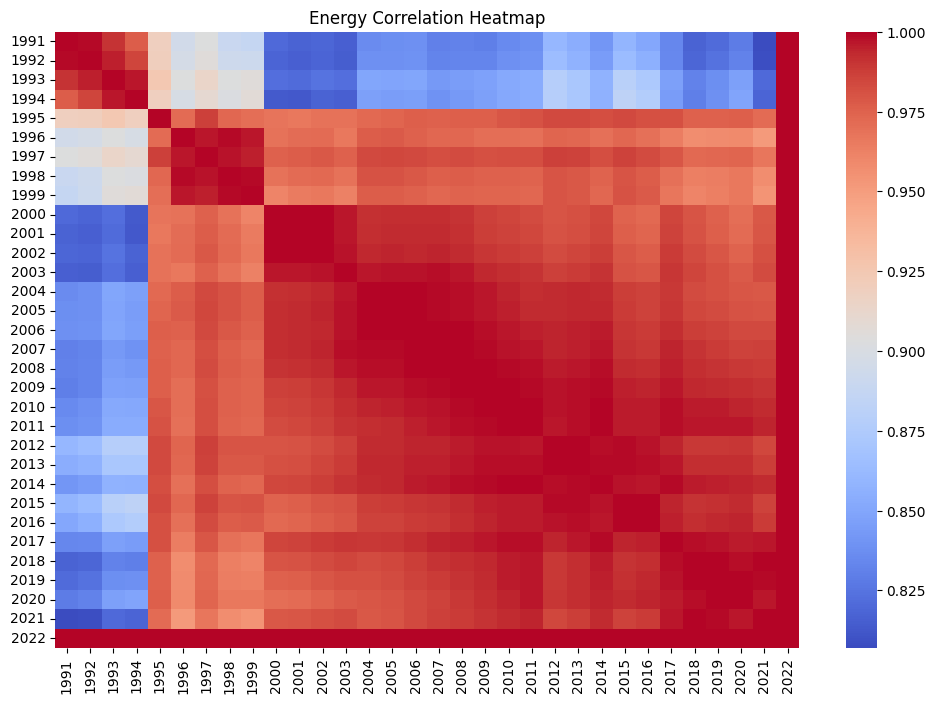

In [62]:
plt.figure(figsize=(12, 8))
sns.heatmap(energy_corr, annot=False, cmap='coolwarm')
plt.title('Energy Correlation Heatmap')
plt.show()

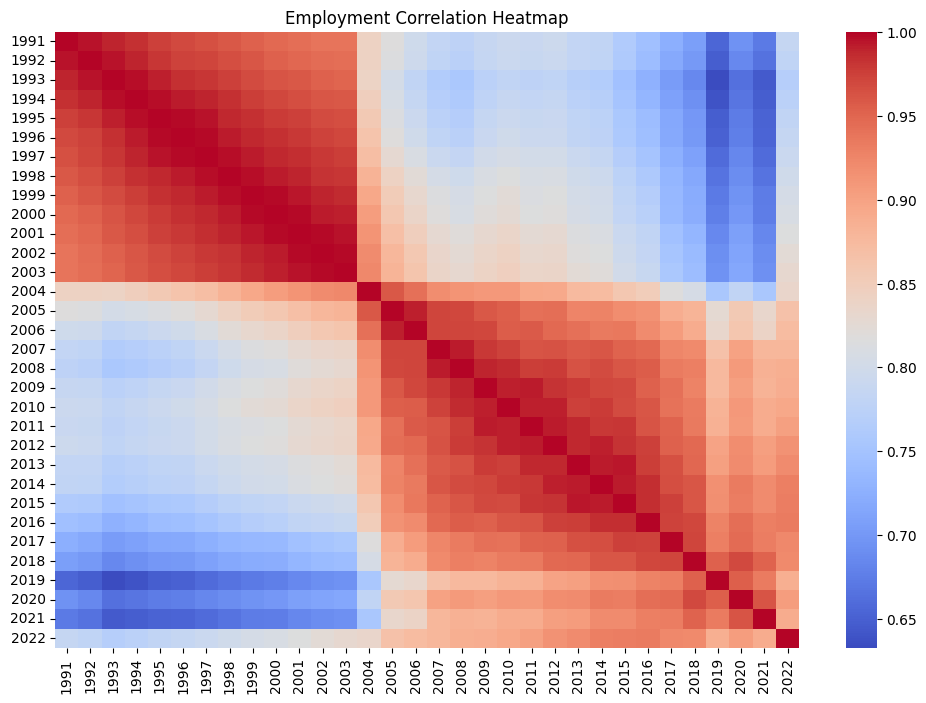

In [63]:
plt.figure(figsize=(12, 8))
sns.heatmap(employment_corr, annot=False, cmap='coolwarm')
plt.title('Employment Correlation Heatmap')
plt.show()

Scatter Plots to Explore Relationships

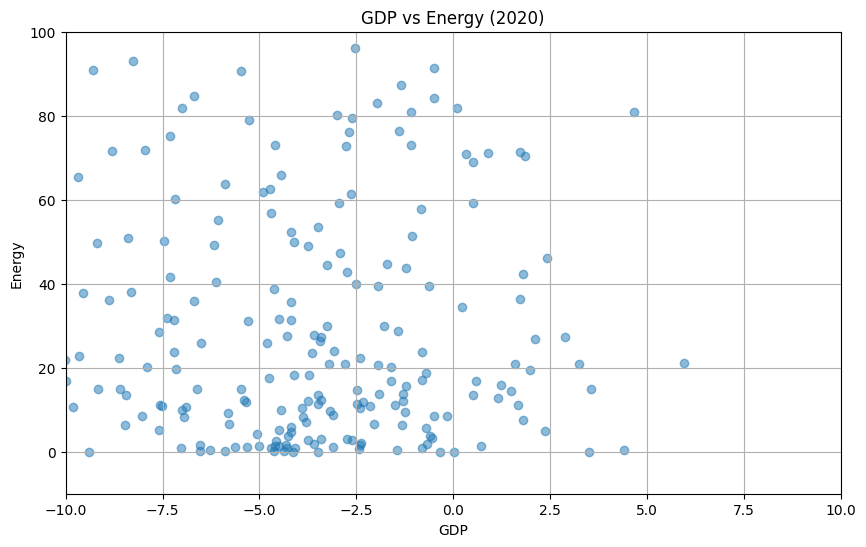

In [64]:
gdp_2020 = combined_gdp['2020']
energy_2020 = combined_energy['2020']

mask = gdp_2020.notna() & energy_2020.notna()
gdp_2020_clean = gdp_2020[mask]
energy_2020_clean = energy_2020[mask]

# Set axis limits to exclude extreme outliers
gdp_xlim = [-10, 10]
energy_ylim = [-10, 100]

plt.figure(figsize=(10, 6))
plt.scatter(gdp_2020_clean, energy_2020_clean, alpha=0.5)
plt.title('GDP vs Energy (2020)')
plt.xlabel('GDP')
plt.ylabel('Energy')
plt.xlim(gdp_xlim)
plt.ylim(energy_ylim)
plt.grid(True)
plt.show()


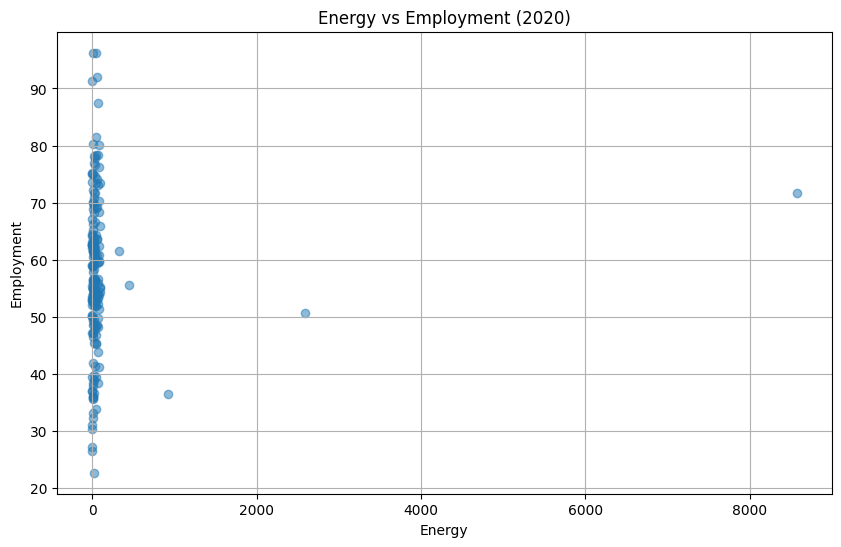

In [65]:
emp_2020 = combined_employment['2020']
energy_2020 = combined_energy['2020']

mask = emp_2020.notna() & energy_2020.notna()
emp_2020_clean = emp_2020[mask]
energy_2020_clean = energy_2020[mask]

# Scatter plot between Energy and Employment for 2020
plt.figure(figsize=(10, 6))
plt.scatter(energy_2020_clean, emp_2020_clean, alpha=0.5)
plt.title('Energy vs Employment (2020)')
plt.xlabel('Energy')
plt.ylabel('Employment')
plt.grid(True)
plt.show()


# **3. Modeling and Analysis**

**3.1 Regression Analysis:**

Analyze the relationship between renewable energy adoption and economic indicators such as GDP growth and employment rates.

Regression Analysis for Energy vs GDP:
                            OLS Regression Results                            
Dep. Variable:                   2020   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.3408
Date:                Wed, 10 Jul 2024   Prob (F-statistic):              0.560
Time:                        08:38:50   Log-Likelihood:                -658.05
No. Observations:                 182   AIC:                             1320.
Df Residuals:                     180   BIC:                             1327.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        

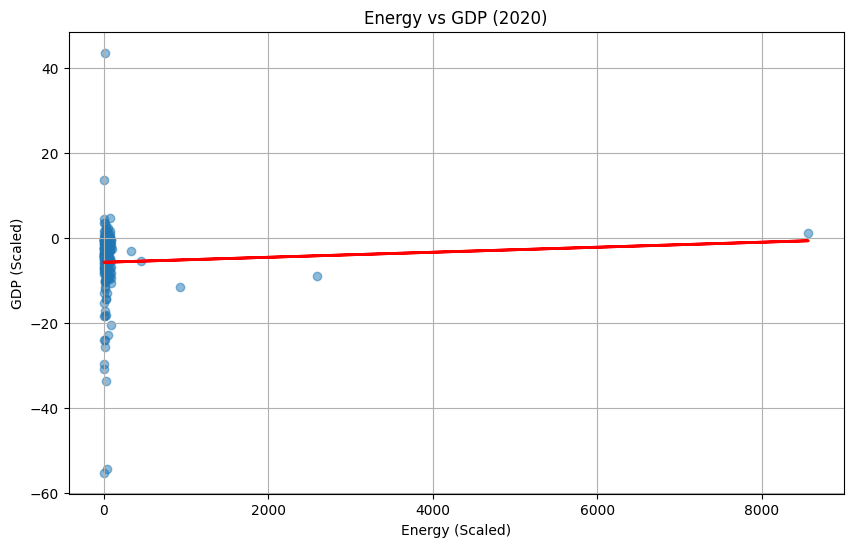

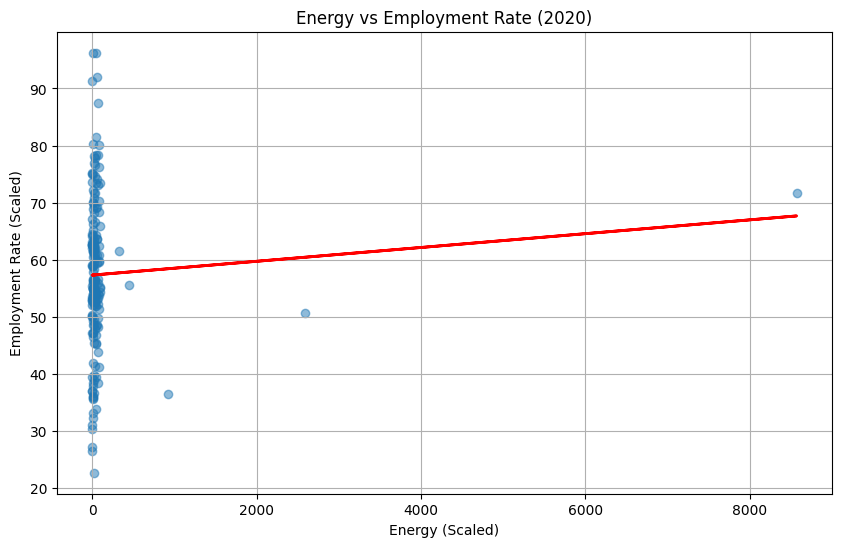

In [68]:
def align_and_clean_data(df1, df2, df3, year):
    # Претвори ги колоните во нумерички вредноcти, заменувајќи ги невалидните со NaN
    df1_year = pd.to_numeric(df1[year], errors='coerce')
    df2_year = pd.to_numeric(df2[year], errors='coerce')
    df3_year = pd.to_numeric(df3[year], errors='coerce')

    # Создади маска за редовите кои немаат NaN вредности
    mask = df1_year.notna() & df2_year.notna() & df3_year.notna()

    # Примени ја маската за да ги задржиш само валидните редови
    df1_clean = df1_year[mask]
    df2_clean = df2_year[mask]
    df3_clean = df3_year[mask]

    return df1_clean, df2_clean, df3_clean

import statsmodels.api as sm


def linear_regression(x, y):
    x = sm.add_constant(x)
    model = sm.OLS(y, x).fit()
    return model

year = '2020'

energy_2020, gdp_2020, emp_2020 = align_and_clean_data(combined_energy, combined_gdp, combined_employment, year)

# Reg. analysis for energy vs gdp
model_energy_gdp = linear_regression(energy_2020, gdp_2020)
print("Regression Analysis for Energy vs GDP:")
print(model_energy_gdp.summary())

# Reg. analysis for energy vs employment
model_energy_emp = linear_regression(energy_2020, emp_2020)
print("Regression Analysis for Energy vs Employment:")
print(model_energy_emp.summary())

# Plot regression results
def plot_regression(x, y, model, xlabel, ylabel, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, alpha=0.5)
    plt.plot(x, model.predict(sm.add_constant(x)), color='red', linewidth=2)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

plot_regression(energy_2020, gdp_2020, model_energy_gdp, 'Energy (Scaled)', 'GDP (Scaled)', 'Energy vs GDP (2020)')
plot_regression(energy_2020, emp_2020, model_energy_emp, 'Energy (Scaled)', 'Employment Rate (Scaled)', 'Energy vs Employment Rate (2020)')


**Combine the Datasets**

In [69]:
# Converting data to long format
gdp_long = pd.melt(combined_gdp, id_vars=['Country Name'], var_name='Year', value_name='GDP')
employment_long = pd.melt(combined_employment, id_vars=['Country Name'], var_name='Year', value_name='Employment')
energy_long = pd.melt(combined_energy, id_vars=['Country Name'], var_name='Year', value_name='Energy')

gdp_long['Year'] = gdp_long['Year'].astype(int)
employment_long['Year'] = employment_long['Year'].astype(int)
energy_long['Year'] = energy_long['Year'].astype(int)

combined_data = pd.merge(gdp_long, employment_long, on=['Country Name', 'Year'])
combined_data = pd.merge(combined_data, energy_long, on=['Country Name', 'Year'])

print(combined_data.head())

                  Country Name  Year        GDP Employment     Energy
0                  Afghanistan  1991        NaN     43.256  67.980296
1  Africa Eastern and Southern  1991  -0.112181   66.04153  15.352872
2   Africa Western and Central  1991   1.109776  63.236562  60.318735
3                      Albania  1991 -28.002142     57.568  92.142483
4                      Algeria  1991  -1.200001     34.944   1.689248


**Decomposition of Time Series Data**

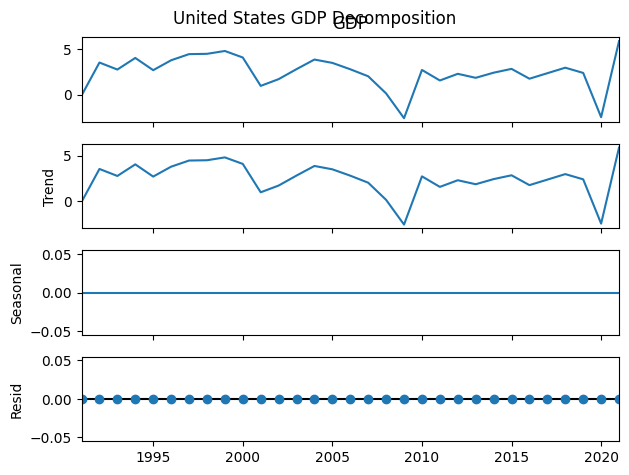

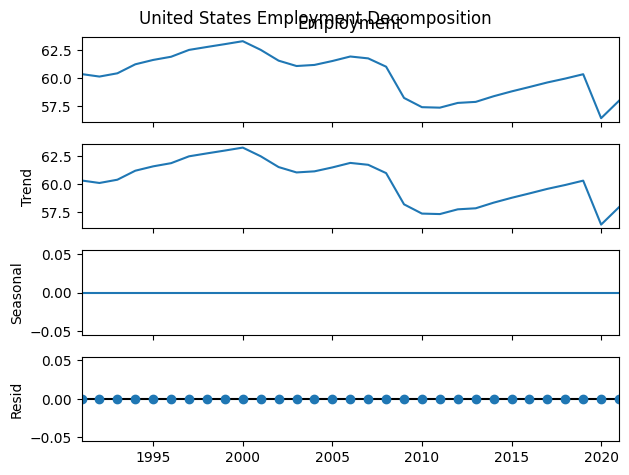

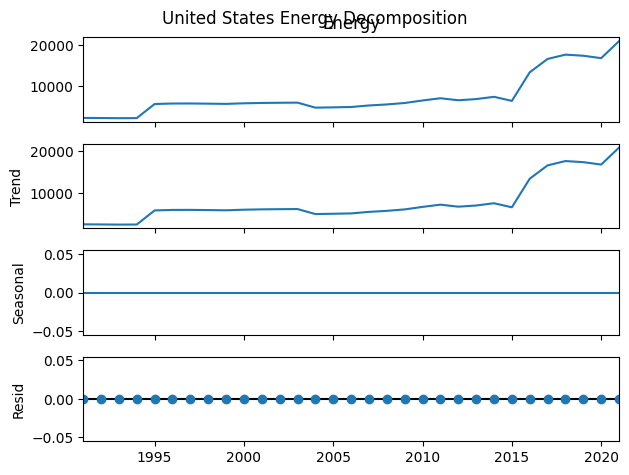

In [70]:
warnings.filterwarnings("ignore")

# filtering the data for the United States
country = 'United States'
country_data = combined_data[combined_data['Country Name'] == country]

country_data = country_data.sort_values(by='Year')

country_data.set_index('Year', inplace=True)

country_data.dropna(inplace=True)

# decomposing the time series data for gdp
decomposition_gdp = seasonal_decompose(country_data['GDP'], model='additive', period=1)
decomposition_gdp.plot()
plt.suptitle(f'{country} GDP Decomposition')
plt.show()

# decomposing the time series data for employment
decomposition_employment = seasonal_decompose(country_data['Employment'], model='additive', period=1)
decomposition_employment.plot()
plt.suptitle(f'{country} Employment Decomposition')
plt.show()

# decomposing the time series data for energy
decomposition_energy = seasonal_decompose(country_data['Energy'], model='additive', period=1)
decomposition_energy.plot()
plt.suptitle(f'{country} Energy Decomposition')
plt.show()

**Forecasting Future Values**

In [72]:
usa_data = country_data
usa_data.index = pd.to_datetime(usa_data.index, format='%Y')

usa_data['GDP'] = pd.to_numeric(usa_data['GDP'], errors='coerce')
usa_data['Employment'] = pd.to_numeric(usa_data['Employment'], errors='coerce')
usa_data['Energy'] = pd.to_numeric(usa_data['Energy'], errors='coerce')

usa_data_clean = usa_data.dropna(subset=['GDP', 'Employment', 'Energy'])

gdp_series = usa_data_clean['GDP']
employment_series = usa_data_clean['Employment']
energy_series = usa_data_clean['Energy']

In [73]:
def sarima_forecast(time_series, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12), steps=10):
    model = SARIMAX(time_series, order=order, seasonal_order=seasonal_order)
    results = model.fit()
    forecast = results.get_forecast(steps=steps)
    forecast_ci = forecast.conf_int()
    return forecast, forecast_ci, results

forecast_period = 10

gdp_forecast, gdp_forecast_ci, gdp_results = sarima_forecast(gdp_series, steps=forecast_period)
employment_forecast, employment_forecast_ci, employment_results = sarima_forecast(employment_series, steps=forecast_period)
energy_forecast, energy_forecast_ci, energy_results = sarima_forecast(energy_series, steps=forecast_period)

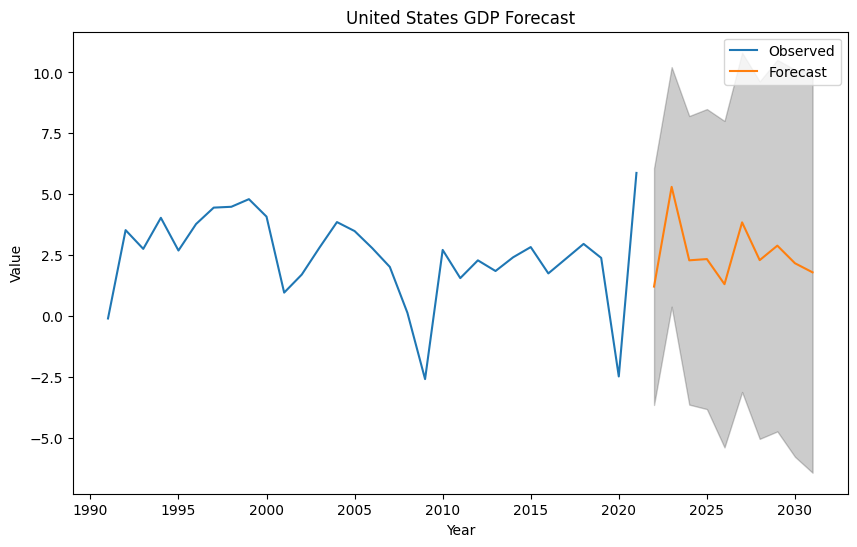

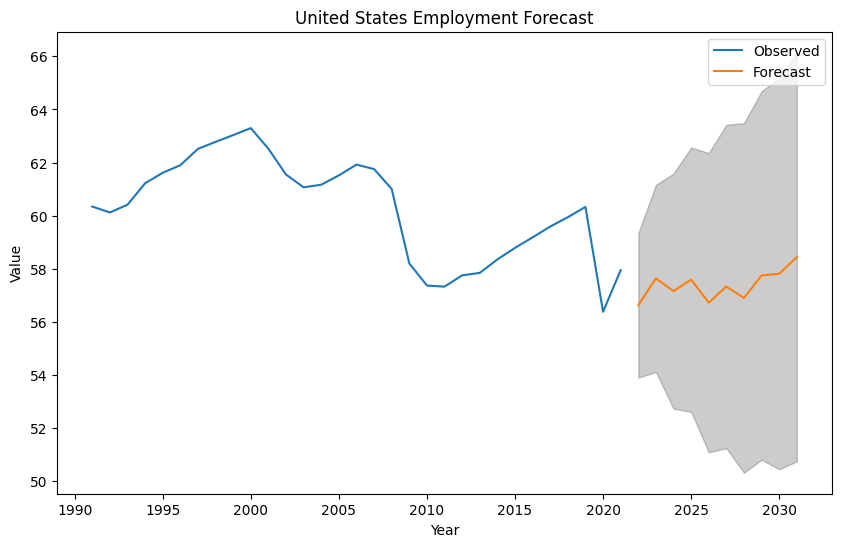

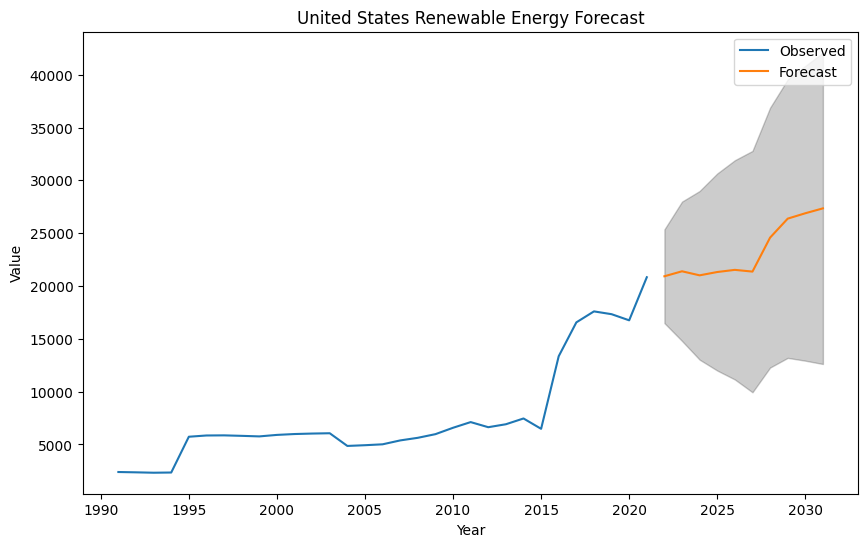

In [74]:
# plot the forecast
def plot_forecast(series, forecast, forecast_ci, title):
    plt.figure(figsize=(10, 6))
    plt.plot(series, label='Observed')
    plt.plot(forecast.predicted_mean, label='Forecast')
    plt.fill_between(forecast_ci.index,
                     forecast_ci.iloc[:, 0],
                     forecast_ci.iloc[:, 1], color='k', alpha=0.2)
    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

plot_forecast(gdp_series, gdp_forecast, gdp_forecast_ci, 'United States GDP Forecast')
plot_forecast(employment_series, employment_forecast, employment_forecast_ci, 'United States Employment Forecast')
plot_forecast(energy_series, energy_forecast, energy_forecast_ci, 'United States Renewable Energy Forecast')